# <font color = "Green"> This notebook is a comprehensive program used for data preprocesssing and build models for Predicting EV Buying Intention

# <font color= "Indigo">Project Team:
<ol>
  <font color= "Indigo"><li>Gayathri Shanmugam</li>
  <li>Kayalvizhi Vellaichamy</li>
  <li>Nitya Malladi</li>
    <li>Saranya Anandan</li>
</ol>

### Context
The global auto manufacturing industry is undergoing rapid transformation by shifting focus from fuel-based vehicles to zero-emission vehicles (ZEVs). ZEVs are further categorized into battery electric vehicles and hydrogen fuel cell electric vehicles. In the United States, the federal government has mandated that at least 50% of the total cars sold should belong to the zero-emission category by the year 2030.
The scope of this project is to build a predictive model which classifies EV buyers in the United States based on their socio-demographic characteristics and their views on the current EV ecosystem. As per a recent survey, 53% of American vehicle users continue to prefer the traditional fuel-based vehicles over electric vehicles.This is a concerning issue for the government, auto companies and their dealers, and needs to be addressed by classifying an EV buyer from a non-buyer. Once the non-buyers are identified, focused strategies can be implemented to convert them into EV buyers

### Data attribute information


In [1]:
# conda install -c conda-forge lightgbm

### Import required packages.

In [2]:
from pathlib import Path

import numpy as np
import pandas as pd

from sklearn.linear_model import LogisticRegression
from mord import LogisticIT

from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA, KernelPCA
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn import neighbors 
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
import statsmodels.api as sm


from dmba import classificationSummary, gainsChart, liftChart
from dmba import adjusted_r2_score, AIC_score, BIC_score
from dmba import regressionSummary, exhaustive_search 
from dmba import backward_elimination, forward_selection, stepwise_selection
from dmba import plotDecisionTree, classificationSummary, regressionSummary

from sklearn.neural_network import MLPClassifier, MLPRegressor 
from sklearn.preprocessing import StandardScaler

%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings("ignore")

no display found. Using non-interactive Agg backend


## Loading dataset

In [3]:
# Create data frame for EV data set.
EV_intention_df = pd.read_csv('AfterMerge_Dataset.csv')

# Display the first 10 records of EV_intention_df data frame.
print(EV_intention_df.head(10))


   bichoice  range  home_chg  work_chg  town  highway  gender          state  \
0         0      1         3         1     3        2       0  Massachusetts   
1         0      4         3         3     4        2       0  Massachusetts   
2         0      2         5         0     2        4       0  Massachusetts   
3         0      4         5         0     1        1       0  Massachusetts   
4         0      1         5         0     1        2       0  Massachusetts   
5         0      3        20        10     2        4       0  Massachusetts   
6         1      3         1         1     3        2       0  Massachusetts   
7         0      1         3         3     4        2       0  Massachusetts   
8         0      1         3         5     4        1       0  Massachusetts   
9         0      2         5        20     3        4       0  Massachusetts   

   Region  education  ...  home_parking  home_evse  work_parking  work_evse  \
0       1          4  ...             3 

# Data preprocessing

### Understanding the shape of the dataset

In [4]:
# Determine dimensions of dataframe. 
print('Dimensions of dataframe:',EV_intention_df.shape )
# It has 5898 rows and 27 columns.

Dimensions of dataframe: (5898, 27)


In [5]:
EV_intention_df.duplicated().sum()


0

In [6]:
EV_intention_df.isna().sum()

bichoice        0
range           0
home_chg        0
work_chg        0
town            0
highway         0
gender          0
state           0
Region          0
education       0
employment      0
hsincome        0
hsize           0
housit          0
residence       0
all_cars        0
ev_cars         0
home_parking    0
home_evse       0
work_parking    0
work_evse       0
buycar          0
zipcode         0
dmileage        0
long_dist       0
Age_category    0
RUCA            0
dtype: int64

### Check the data types of the columns for the dataset.

In [7]:
# Display column data types in the dataframe
print('Datatypes of all the columns in the dataset')
print(EV_intention_df.info())
EV_intention_df.describe().T

Datatypes of all the columns in the dataset
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5898 entries, 0 to 5897
Data columns (total 27 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   bichoice      5898 non-null   int64 
 1   range         5898 non-null   int64 
 2   home_chg      5898 non-null   int64 
 3   work_chg      5898 non-null   int64 
 4   town          5898 non-null   int64 
 5   highway       5898 non-null   int64 
 6   gender        5898 non-null   int64 
 7   state         5898 non-null   object
 8   Region        5898 non-null   int64 
 9   education     5898 non-null   int64 
 10  employment    5898 non-null   int64 
 11  hsincome      5898 non-null   int64 
 12  hsize         5898 non-null   int64 
 13  housit        5898 non-null   int64 
 14  residence     5898 non-null   int64 
 15  all_cars      5898 non-null   int64 
 16  ev_cars       5898 non-null   int64 
 17  home_parking  5898 non-null   int64 
 18  home

count          mean           std     min      25%      50%  \
bichoice      5898.0      0.550017      0.497534     0.0      0.0      1.0   
range         5898.0      2.507460      1.112326     1.0      2.0      3.0   
home_chg      5898.0      5.943371      6.602592     0.0      1.0      3.0   
work_chg      5898.0      5.899627      6.574685     0.0      1.0      3.0   
town          5898.0      2.504408      1.124472     1.0      1.0      3.0   
highway       5898.0      2.502204      1.115089     1.0      2.0      2.0   
gender        5898.0      0.503561      0.500030     0.0      0.0      1.0   
Region        5898.0      2.899288      1.367156     1.0      2.0      3.0   
education     5898.0      2.703967      0.839617     1.0      2.0      3.0   
employment    5898.0      1.659207      1.291301     1.0      1.0      1.0   
hsincome      5898.0      1.793489      0.886894     1.0      1.0      2.0   
hsize         5898.0      2.672431      1.314606     1.0      2.0      2.0   
housit        5898.0      1.460834      0.620362     1.0      1.0      1.0   
residence     5898.0      2.031536      1.717753     1.0      1.0      1.0   
all_cars      5898.0      1.582909      0.719641     1.0      1.0      1.0   
ev_cars       5898.0      0.078332      0.297468     0.0      0.0      0.0   
home_parking  5898.0      3.323499      1.865167     1.0      1.0      3.0   
home_evse     5898.0      1.835198      0.445773     1.0      2.0      2.0   
work_parking  5898.0      2.654120      1.400017     1.0      2.0      2.0   
work_evse     5898.0      1.962360      0.608242     1.0      2.0      2.0   
buycar        5898.0      1.777213      0.854842     1.0      1.0      1.0   
zipcode       5898.0  52330.798576  29095.128072  1247.0  29483.0  48073.0   
dmileage      5898.0     24.750763     20.347513     0.0     10.0     20.0   
long_dist     5898.0      1.486267      1.316556     0.0      0.0      1.0   
Age_category  5898.0      1.949135      0.867394     1.0      1.0      2.0   
RUCA          5898.0      1.214649      0.586181     1.0      1.0      1.0   

                  75%      max  
bichoice          1.0      1.0  
range             3.0      4.0  
home_chg         10.0     20.0  
work_chg         10.0     20.0  
town              4.0      4.0  
highway           3.0      4.0  
gender            1.0      1.0  
Region            4.0      5.0  
education         3.0      4.0  
employment        2.0      6.0  
hsincome          2.0      5.0  
hsize             4.0      5.0  
housit            2.0      4.0  
residence         2.0      8.0  
all_cars          2.0      4.0  
ev_cars           0.0      4.0  
home_parking      5.0      6.0  
home_evse         2.0      3.0  
work_parking      4.0      6.0  
work_evse         2.0      3.0  
buycar            3.0      3.0  
zipcode       78258.0  99703.0  
dmileage         30.0    100.0  
long_dist         2.0      4.0  
Age_category      2.0      4.0  
RUCA              1.0      4.0

- There are no null values
- All columns are integer type except state which is of object datatype
- Some of the attributes need the conversion into their equivalent dummy values

In [8]:
# Display column data types in the dataframe before modification
print('Original Column data types')
print(EV_intention_df.dtypes)

Original Column data types
bichoice         int64
range            int64
home_chg         int64
work_chg         int64
town             int64
highway          int64
gender           int64
state           object
Region           int64
education        int64
employment       int64
hsincome         int64
hsize            int64
housit           int64
residence        int64
all_cars         int64
ev_cars          int64
home_parking     int64
home_evse        int64
work_parking     int64
work_evse        int64
buycar           int64
zipcode          int64
dmileage         int64
long_dist        int64
Age_category     int64
RUCA             int64
dtype: object


In [9]:
# Need to change all the variables with multiple classes to 'category'datatype 
EV_intention_df.gender = EV_intention_df.gender.astype('category')
EV_intention_df.state = EV_intention_df.state.astype('category')
EV_intention_df.employment = EV_intention_df.employment.astype('category')
EV_intention_df.hsize = EV_intention_df.hsize.astype('category')
EV_intention_df.housit = EV_intention_df.housit.astype('category')
EV_intention_df.residence = EV_intention_df.residence.astype('category')
#EV_intention_df.zipcode = EV_intention_df.zipcode.astype('category')
EV_intention_df.buycar = EV_intention_df.buycar.astype('category')
EV_intention_df.home_evse = EV_intention_df.home_evse.astype('category')
EV_intention_df.work_evse = EV_intention_df.work_evse.astype('category')
EV_intention_df.town = EV_intention_df.town.astype('category')
EV_intention_df.highway = EV_intention_df.highway.astype('category')
EV_intention_df.home_parking = EV_intention_df.home_parking.astype('category')
EV_intention_df.work_parking = EV_intention_df.work_parking.astype('category')
EV_intention_df.RUCA = EV_intention_df.RUCA.astype('category')
EV_intention_df.Region = EV_intention_df.Region.astype('category')
EV_intention_df.Age_category = EV_intention_df.Age_category.astype('category')
EV_intention_df.education = EV_intention_df.education.astype('category')
EV_intention_df.hsincome = EV_intention_df.hsincome.astype('category')
EV_intention_df.range = EV_intention_df.range.astype('category')
EV_intention_df.bichoice = EV_intention_df.bichoice.astype('category')

# Display category levels (attributes) and category type.
print(' ')
print('Category levels and changed variable type:')
print(EV_intention_df.gender.cat.categories)
print(EV_intention_df.gender.dtype)
print(EV_intention_df.state.cat.categories)
print(EV_intention_df.state.dtype)
print(EV_intention_df.employment.cat.categories)
print(EV_intention_df.employment.dtype)
print(EV_intention_df.hsize.cat.categories)
print(EV_intention_df.hsize.dtype)
print(EV_intention_df.housit.cat.categories)
print(EV_intention_df.housit.dtype)
print(EV_intention_df.residence.cat.categories)
print(EV_intention_df.residence.dtype)
print(EV_intention_df.bichoice.cat.categories)
print(EV_intention_df.bichoice.dtype)
# print(EV_intention_df.zipcode.cat.categories)
# print(EV_intention_df.zipcode.dtype)
print(EV_intention_df.buycar.cat.categories)
print(EV_intention_df.buycar.dtype)
print(EV_intention_df.home_evse.cat.categories)
print(EV_intention_df.home_evse.dtype)
print(EV_intention_df.work_evse.cat.categories)
print(EV_intention_df.work_evse.dtype)
print(EV_intention_df.town.cat.categories)
print(EV_intention_df.town.dtype)
print(EV_intention_df.highway.cat.categories)
print(EV_intention_df.highway.dtype)
print(EV_intention_df.home_parking.cat.categories)
print(EV_intention_df.home_parking.dtype)
print(EV_intention_df.work_parking.cat.categories)
print(EV_intention_df.work_parking.dtype)
print(EV_intention_df.RUCA.cat.categories)
print(EV_intention_df.RUCA.dtype)
print(EV_intention_df.Region.cat.categories)
print(EV_intention_df.Region.dtype)
print(EV_intention_df.Age_category.cat.categories)
print(EV_intention_df.Age_category.dtype)
print(EV_intention_df.education.cat.categories)
print(EV_intention_df.education.dtype)
print(EV_intention_df.hsincome.cat.categories)
print(EV_intention_df.hsincome.dtype)
print(EV_intention_df.range.cat.categories)
print(EV_intention_df.range.dtype)
print(EV_intention_df.bichoice.cat.categories)
print(EV_intention_df.bichoice.dtype)

 
Category levels and changed variable type:
Int64Index([0, 1], dtype='int64')
category
Index(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado',
       'Connecticut', 'Delaware', 'Florida', 'Georgia', 'Hawaii', 'Idaho',
       'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana',
       'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota',
       'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada',
       'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
       'North Carolina', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania',
       'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee', 'Texas',
       'Utah', 'Vermont', 'Virginia', 'Washington', 'West Virginia',
       'Wisconsin', 'Wyoming'],
      dtype='object')
category
Int64Index([1, 2, 3, 4, 5, 6], dtype='int64')
category
Int64Index([1, 2, 3, 4, 5], dtype='int64')
category
Int64Index([1, 2, 3, 4], dtype='int64')
category
Int64Index([1, 2, 3, 4, 5, 6, 8], dtype='int64')

In [10]:
ordinal_encoded_columns= ['state']

ordinal_encoder = OrdinalEncoder(categories='auto')
ordinal_encoded_data = ordinal_encoder.fit_transform(EV_intention_df[ordinal_encoded_columns])

#Convert it to df
ordinal_encoded_data_df = pd.DataFrame(ordinal_encoded_data, index=EV_intention_df.index,columns=['state'])
# # ordinal_encoded_data_df.columns = ordinal_encoder.get_feature_names_out(input_features=EV_intention_df[ordinal_encoded_columns])

# #Extract only the columns that didnt need to be encoded
data_other_cols = EV_intention_df.drop(columns=ordinal_encoded_columns)

# #Concatenate the two dataframes : 
EV_intention_df = pd.concat([ordinal_encoded_data_df, data_other_cols], axis=1)
print(EV_intention_df)
EV_intention_df.shape



      state bichoice range  home_chg  work_chg town highway gender Region  \
0      20.0        0     1         3         1    3       2      0      1   
1      20.0        0     4         3         3    4       2      0      1   
2      20.0        0     2         5         0    2       4      0      1   
3      20.0        0     4         5         0    1       1      0      1   
4      20.0        0     1         5         0    1       2      0      1   
...     ...      ...   ...       ...       ...  ...     ...    ...    ...   
5893    1.0        0     2        10         5    2       2      0      5   
5894    1.0        1     3         1         3    4       3      0      5   
5895    1.0        0     1        20         2    2       4      0      5   
5896    1.0        0     2        20         5    4       2      0      5   
5897    1.0        0     1         2         1    3       1      0      5   

     education  ... home_parking home_evse work_parking work_evse buycar  \

(5898, 27)

In [11]:
EV_intention_df.state = EV_intention_df.state.astype('category')


In [14]:
# Display column data types in the dataframe after modification
print('Modified Column data types')
print(EV_intention_df.dtypes)

Modified Column data types
state           category
bichoice        category
range           category
home_chg           int64
work_chg           int64
town            category
highway         category
gender          category
Region          category
education       category
employment      category
hsincome        category
hsize           category
housit          category
residence       category
all_cars           int64
ev_cars            int64
home_parking    category
home_evse       category
work_parking    category
work_evse       category
buycar          category
zipcode            int64
dmileage           int64
long_dist          int64
Age_category    category
RUCA            category
dtype: object


### Data summary

In [15]:
# Use describe() function to display column statistics for the entire data set. 
np.round(EV_intention_df.describe(), decimals=2).T

count      mean       std     min      25%      50%      75%  \
home_chg   5898.0      5.94      6.60     0.0      1.0      3.0     10.0   
work_chg   5898.0      5.90      6.57     0.0      1.0      3.0     10.0   
all_cars   5898.0      1.58      0.72     1.0      1.0      1.0      2.0   
ev_cars    5898.0      0.08      0.30     0.0      0.0      0.0      0.0   
zipcode    5898.0  52330.80  29095.13  1247.0  29483.0  48073.0  78258.0   
dmileage   5898.0     24.75     20.35     0.0     10.0     20.0     30.0   
long_dist  5898.0      1.49      1.32     0.0      0.0      1.0      2.0   

               max  
home_chg      20.0  
work_chg      20.0  
all_cars       4.0  
ev_cars        4.0  
zipcode    99703.0  
dmileage     100.0  
long_dist      4.0

### Observation


In [16]:
#Develop predictors X and output variable Y for the data set.
X = EV_intention_df.drop(columns=['bichoice','zipcode'])
y = EV_intention_df['bichoice']

# Develop training (60%) and validation(40% or 0.4) partitions for
# heart_disease_df data frame.
train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size=0.3, random_state=1)
print('Training : ', train_X.shape)
print('Validation : ', valid_X.shape)

Training :  (4128, 25)
Validation :  (1770, 25)


In [17]:
print('Predictors list')
print(X.columns)

Predictors list
Index(['state', 'range', 'home_chg', 'work_chg', 'town', 'highway', 'gender',
       'Region', 'education', 'employment', 'hsincome', 'hsize', 'housit',
       'residence', 'all_cars', 'ev_cars', 'home_parking', 'home_evse',
       'work_parking', 'work_evse', 'buycar', 'dmileage', 'long_dist',
       'Age_category', 'RUCA'],
      dtype='object')


In [18]:
scaler = StandardScaler()

In [19]:
# Note the use of an array of column names.
scaler.fit(train_X[['state','range', 'home_chg', 'work_chg', 'town', 'highway', 'gender', 'Region',
       'education', 'employment', 'hsincome', 'hsize', 'housit', 'residence',
       'all_cars', 'ev_cars', 'home_parking', 'home_evse', 'work_parking',
       'work_evse', 'buycar', 'dmileage', 'long_dist', 'Age_category', 'RUCA']])  


StandardScaler()

In [20]:
# Transform the full data set into standardized (normalized) data set. 
#train_X.reset_index(drop=True,inplace=True)
train_X = pd.concat([pd.DataFrame(scaler.transform(train_X[['state','range', 'home_chg', 'work_chg', 'town', 'highway', 'gender', 'Region',
       'education', 'employment', 'hsincome', 'hsize', 'housit', 'residence',
       'all_cars', 'ev_cars', 'home_parking', 'home_evse', 'work_parking',
       'work_evse', 'buycar', 'dmileage', 'long_dist', 'Age_category', 'RUCA']]), 
                                    columns=['zstate','zrange', 'zhome_chg', 'zwork_chg', 'ztown', 'zhighway', 'zgender', 'zRegion',
       'zeducation', 'zemployment', 'zhsincome', 'zhsize', 'zhousit', 'zresidence',
       'zall_cars', 'zev_cars', 'zhome_parking', 'zhome_evse', 'zwork_parking',
       'zwork_evse', 'zbuycar', 'zdmileage', 'zlong_dist', 'zAge_category', 'zRUCA'],index=train_X.index),
                       train_X ], axis=1)
print('Standardized (Normalized) Values of EV Intention Data Set')
print()
print(train_X)

Standardized (Normalized) Values of EV Intention Data Set

        zstate    zrange  zhome_chg  zwork_chg     ztown  zhighway   zgender  \
5495  0.789037  1.325118  -0.150337  -0.126720  0.445019  1.348281 -1.031504   
2146 -1.081373  1.325118   0.602443  -0.587059 -1.323064  1.348281  0.969458   
1893 -1.081373  1.325118  -0.602005   2.174977 -0.439022 -1.349152  0.969458   
4741 -1.497020  0.434079   0.602443  -0.433613 -1.323064 -0.450008 -1.031504   
1686 -1.081373 -0.456960   0.602443  -0.126720 -0.439022 -0.450008  0.969458   
...        ...       ...        ...        ...       ...       ...       ...   
905   1.412508 -1.347998  -0.602005   2.174977 -0.439022  1.348281 -1.031504   
5192 -1.358471  0.434079   0.602443  -0.126720  1.329060  1.348281  0.969458   
3980 -0.457903 -1.347998  -0.150337  -0.126720 -1.323064  0.449137 -1.031504   
235   1.343233 -0.456960   2.108003  -0.126720  1.329060 -0.450008  0.969458   
5157 -1.358471  0.434079  -0.451449  -0.893952 -0.439022 -1.3

In [21]:
# Transform the full data set into standardized (normalized) data set. 
#valid_X.reset_index(drop=True,inplace=True)
valid_X = pd.concat([pd.DataFrame(scaler.transform(valid_X[['state','range', 'home_chg', 'work_chg', 'town', 'highway', 'gender', 'Region',
       'education', 'employment', 'hsincome', 'hsize', 'housit', 'residence',
       'all_cars', 'ev_cars', 'home_parking', 'home_evse', 'work_parking',
       'work_evse', 'buycar', 'dmileage', 'long_dist', 'Age_category', 'RUCA']]), 
                                    columns=['zstate','zrange', 'zhome_chg', 'zwork_chg', 'ztown', 'zhighway', 'zgender', 'zRegion',
       'zeducation', 'zemployment', 'zhsincome', 'zhsize', 'zhousit', 'zresidence',
       'zall_cars', 'zev_cars', 'zhome_parking', 'zhome_evse', 'zwork_parking',
       'zwork_evse', 'zbuycar', 'zdmileage', 'zlong_dist', 'zAge_category', 'zRUCA'],index=valid_X.index),
                       valid_X ], axis=1)
print('Standardized (Normalized) Values of EV Intention Data Set')
print()
print(valid_X)

Standardized (Normalized) Values of EV Intention Data Set

        zstate    zrange  zhome_chg  zwork_chg     ztown  zhighway   zgender  \
573   0.858312 -0.456960  -0.903117  -0.433613 -0.439022 -1.349152 -1.031504   
3219  1.620331  0.434079   2.108003  -0.740506 -0.439022  0.449137 -1.031504   
4436  1.204684 -1.347998   2.108003  -0.587059  0.445019 -0.450008  0.969458   
3887  0.165567  0.434079   0.602443   2.174977 -0.439022 -0.450008 -1.031504   
3656  0.027018  1.325118  -0.150337   0.640513  0.445019 -0.450008 -1.031504   
...        ...       ...        ...        ...       ...       ...       ...   
3321 -0.111531 -0.456960  -0.602005  -0.126720  1.329060 -1.349152 -1.031504   
2105 -1.081373 -0.456960  -0.451449  -0.740506 -0.439022  1.348281  0.969458   
710   0.858312  1.325118  -0.602005   2.174977 -0.439022 -1.349152 -1.031504   
4302  1.204684  1.325118  -0.602005  -0.126720  0.445019 -1.349152  0.969458   
3201  1.620331  0.434079  -0.602005   0.640513 -0.439022 -0.4

In [22]:
train_X_s = train_X.drop(columns= ['state','range', 'home_chg', 'work_chg', 'town', 'highway', 'gender', 'Region',
       'education', 'employment', 'hsincome', 'hsize', 'housit', 'residence',
       'all_cars', 'ev_cars', 'home_parking', 'home_evse', 'work_parking',
       'work_evse', 'buycar', 'dmileage', 'long_dist', 'Age_category', 'RUCA'])
print(train_X_s)

valid_X_s = valid_X.drop(columns= ['state','range', 'home_chg', 'work_chg', 'town', 'highway', 'gender', 'Region',
       'education', 'employment', 'hsincome', 'hsize', 'housit', 'residence',
       'all_cars', 'ev_cars', 'home_parking', 'home_evse', 'work_parking',
       'work_evse', 'buycar', 'dmileage', 'long_dist', 'Age_category', 'RUCA'])
print(valid_X_s)



        zstate    zrange  zhome_chg  zwork_chg     ztown  zhighway   zgender  \
5495  0.789037  1.325118  -0.150337  -0.126720  0.445019  1.348281 -1.031504   
2146 -1.081373  1.325118   0.602443  -0.587059 -1.323064  1.348281  0.969458   
1893 -1.081373  1.325118  -0.602005   2.174977 -0.439022 -1.349152  0.969458   
4741 -1.497020  0.434079   0.602443  -0.433613 -1.323064 -0.450008 -1.031504   
1686 -1.081373 -0.456960   0.602443  -0.126720 -0.439022 -0.450008  0.969458   
...        ...       ...        ...        ...       ...       ...       ...   
905   1.412508 -1.347998  -0.602005   2.174977 -0.439022  1.348281 -1.031504   
5192 -1.358471  0.434079   0.602443  -0.126720  1.329060  1.348281  0.969458   
3980 -0.457903 -1.347998  -0.150337  -0.126720 -1.323064  0.449137 -1.031504   
235   1.343233 -0.456960   2.108003  -0.126720  1.329060 -0.450008  0.969458   
5157 -1.358471  0.434079  -0.451449  -0.893952 -0.439022 -1.349152  0.969458   

       zRegion  zeducation  zemployment

In [23]:
poly = PolynomialFeatures(degree=2)
poly.fit(train_X_s)
train_X_p = poly.transform(train_X_s)
valid_X_p = poly.transform(valid_X_s)
#X = poly.transform(X)

In [24]:
# print(train_X_p)

# PCA

In [25]:
pca = PCA()

In [26]:
pca.fit(train_X_p)

PCA()

In [27]:
print(pca.explained_variance_ratio_)

[9.78360729e-02 3.05346862e-02 2.70009746e-02 1.98101034e-02
 1.62298250e-02 1.46048107e-02 1.36167867e-02 1.33468946e-02
 1.08972697e-02 9.94091281e-03 9.23334818e-03 9.01566763e-03
 8.70900031e-03 8.44934228e-03 8.33961231e-03 7.82597497e-03
 7.69963620e-03 7.48619476e-03 7.11465598e-03 7.05287930e-03
 7.00827453e-03 6.79356401e-03 6.76921957e-03 6.62224291e-03
 6.53748844e-03 6.32204194e-03 6.22451954e-03 6.17528411e-03
 6.01340996e-03 5.96028547e-03 5.92540845e-03 5.76800276e-03
 5.75719235e-03 5.62846567e-03 5.50750124e-03 5.40014363e-03
 5.34994849e-03 5.09108754e-03 4.99195653e-03 4.95820033e-03
 4.86734993e-03 4.82168452e-03 4.72206026e-03 4.68782919e-03
 4.66864858e-03 4.57044487e-03 4.55607733e-03 4.51641485e-03
 4.44541863e-03 4.38090277e-03 4.34884213e-03 4.34307795e-03
 4.26602405e-03 4.21432719e-03 4.18895414e-03 4.15071266e-03
 4.08815912e-03 4.03194813e-03 3.94388660e-03 3.89743099e-03
 3.87325953e-03 3.81792609e-03 3.79121839e-03 3.74348522e-03
 3.73646525e-03 3.677319

In [28]:
np.sum(pca.explained_variance_ratio_[0:50])

0.4997857169622324

In [29]:
np.sum(pca.explained_variance_ratio_[0:200])

0.8780072114268626

In [30]:
np.sum(pca.explained_variance_ratio_[0:250])

0.939988738700023

In [31]:
# np.sum(pca.explained_variance_ratio_[0:100])

In [32]:
# np.sum(pca.explained_variance_ratio_[0:75])

In [33]:
np.sum(pca.explained_variance_ratio_[0:300])

0.9810418733824948

In [34]:
pca300=PCA(n_components=300)
pca300.fit(train_X_p)
train_X_pca300 = pd.DataFrame(pca300.transform(train_X_p))
valid_X_pca300 = pd.DataFrame(pca300.transform(valid_X_p))

In [35]:
# train_X_pca200
print('Training : ', train_X_pca300.shape)


Training :  (4128, 300)


In [36]:
print('Validation : ', valid_X_pca300.shape)


Validation :  (1770, 300)


In [37]:
# train_X_pca300.head()

In [38]:
# valid_X_pca300.head()

# <font color= "Green">BUILDING THE DATA MINING METHODS:
<ol>
  <font color= "Indigo"><li>Logistic Regression</li>
      <li>Classification Trees</li>
      <li>Random forest trees</li>
  <li>Boosted trees</li>
    <li>Neural Networks</li>
</ol>

## logistic regression 

In [39]:
# Using LogisticRegression() function, fit multiple predictors logistic 
# regression for training partition. Set penalty='l2' for regularization. 
# Regularization is any modification to a learning algorithm that is 
# intended to reduce its generalization error but not its training error.
# Regularization can be used to train models that generalize 
# better on unseen data by preventing the algorithm from overfitting 
# the training data set.
# Parameter C=1e42 and penalty=l2 lead to ordinal logistic regression. 
# solver='liblinear' is used for automated selection of the best parameters
# of the logistis regression; recommended for large-scale classification.
log_reg = LogisticRegression(penalty='l2', C=1e42, solver='liblinear')
log_reg.fit(train_X_pca300, train_y)

# Show intercept and coefficients of the multiple predictors' logistic model.
print('Parameters of Logistic Regresion Model with Multiple Predictors')
print('Intercept:', np.round(log_reg.intercept_[0], decimals=3))
print('Coefficients for Predictors')
print(pd.DataFrame({'Coeff:': np.round(log_reg.coef_[0], decimals=3)}, 
                    index=train_X_pca300.columns).transpose())

Parameters of Logistic Regresion Model with Multiple Predictors
Intercept: 0.285
Coefficients for Predictors
          0      1      2      3      4      5      6      7     8      9    \
Coeff:  0.027 -0.041 -0.006 -0.028 -0.023  0.029  0.034 -0.069 -0.06  0.032   

        ...    290    291    292    293    294    295    296    297    298  \
Coeff:  ... -0.086  0.077 -0.193  0.169  0.074 -0.034  0.237  0.105 -0.203   

          299  
Coeff:  0.014  

[1 rows x 300 columns]


In [40]:
# Make predictions for validation set using multiple
# predictors logistic regression model. 

# Predict multiple predictors logistic model's results 
# (0 or 1) for validation set.
log_pred = log_reg.predict(valid_X_pca300)

# Predict multiple predictors logistic model's probabilities 
# p(0) and p(1) for validation set.
log_prob = np.round(log_reg.predict_proba(valid_X_pca300), decimals=4)

# Create data frame to show multiple predictors logistic
# model resuts for validation set. 
log_result = pd.DataFrame({'Actual': valid_y, 
                    'Classification': log_pred,
                    'p(0)': [p[0] for p in log_prob],
                    'p(1)': [p[1] for p in log_prob]
})

print('Classification for Validation Partition')
print(log_result.head(20))

Classification for Validation Partition
     Actual  Classification    p(0)    p(1)
573       1               1  0.4224  0.5776
3219      1               0  0.6301  0.3699
4436      0               1  0.4548  0.5452
3887      1               1  0.4654  0.5346
3656      1               1  0.2321  0.7679
3680      1               1  0.4403  0.5597
1513      1               1  0.2462  0.7538
79        1               1  0.3176  0.6824
4072      1               1  0.3396  0.6604
3259      0               1  0.3187  0.6813
4765      0               0  0.5318  0.4682
5613      1               0  0.5888  0.4112
2754      1               1  0.4231  0.5769
5194      1               1  0.4654  0.5346
4809      0               0  0.5630  0.4370
850       1               0  0.5168  0.4832
689       0               0  0.7687  0.2313
4804      1               0  0.5099  0.4901
4451      1               0  0.8170  0.1830
2815      0               1  0.2708  0.7292


In [41]:
#calculate AUC of model
auc = metrics.roc_auc_score(valid_y, log_reg.predict_proba(valid_X_pca300)[:,1])

#print AUC score
print(auc)

0.6775280278345391


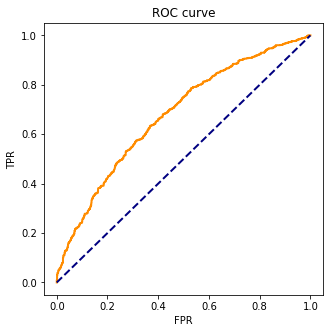

In [42]:
roc_auc_score(valid_y, log_reg.predict_proba(valid_X_pca300)[:,1])

fpr, tpr, _ = roc_curve(valid_y, log_prob[:,1])
plt.figure(figsize=[5, 5])
lw = 2

#plt.clf()
plt.plot(fpr, tpr,color='darkorange',
         lw=lw)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')
plt.show()

In [43]:
# Confusion matrices for multiple predictors logistic model. 

# Identify and display confusion matrix for training partition. 
print('Training Partition')
classificationSummary(train_y, log_reg.predict(train_X_pca300))

# Identify and display confusion matrix for validation partition. 
print()
print('Validation Partition')
classificationSummary(valid_y, log_reg.predict(valid_X_pca300))
print(classification_report(valid_y, log_reg.predict(valid_X_pca300)))

Training Partition
Confusion Matrix (Accuracy 0.7001)

       Prediction
Actual    0    1
     0 1124  713
     1  525 1766

Validation Partition
Confusion Matrix (Accuracy 0.6305)

       Prediction
Actual   0   1
     0 442 375
     1 279 674
              precision    recall  f1-score   support

           0       0.61      0.54      0.57       817
           1       0.64      0.71      0.67       953

    accuracy                           0.63      1770
   macro avg       0.63      0.62      0.62      1770
weighted avg       0.63      0.63      0.63      1770



<AxesSubplot:>

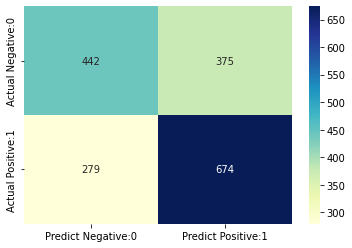

In [44]:
cm = confusion_matrix(valid_y, log_reg.predict(valid_X_pca300))
cm_matrix = pd.DataFrame(data=cm, columns= ['Predict Negative:0','Predict Positive:1'], 
                                 index=[ 'Actual Negative:0','Actual Positive:1'])
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

# logistic regression with grid search

In [45]:
# Identify grid search parameters. 
param_grid = {
    "penalty":["l1","l2"] ,"C":[0.001, 0.01, 0.1, 1, 10, 100, 1000]
}

# Utilize GridSearchCV() to identify the best number 
# of nodes in the hidden layer.
log_reg = LogisticRegression(C=1e42, solver='liblinear')
gridSearch_log = GridSearchCV(log_reg, 
                          param_grid, cv=5, n_jobs=-1, return_train_score=True)
gridSearch_log.fit(train_X_pca300, train_y)

# Display the best score and best parament value.
print(f'Best score:{gridSearch_log.best_score_:.4f}')
print('Best parameter: ', gridSearch_log.best_params_)

Best score:0.6301
Best parameter:  {'C': 0.1, 'penalty': 'l1'}


In [46]:
# Make predictions for validation set using multiple
# predictors logistic regression model. 

# Predict multiple predictors logistic model's results 
# (0 or 1) for validation set.
log_pred_g = gridSearch_log.predict(valid_X_pca300)

# Predict multiple predictors logistic model's probabilities 
# p(0) and p(1) for validation set.
log_prob_g = np.round(gridSearch_log.predict_proba(valid_X_pca300), decimals=4)

# Create data frame to show multiple predictors logistic
# model resuts for validation set. 
log_result_g = pd.DataFrame({'Actual': valid_y, 
                    'Classification': log_pred_g,
                    'p(0)': [p[0] for p in log_prob_g],
                    'p(1)': [p[1] for p in log_prob_g]
})

print('Classification for Validation Partition')
print(log_result_g.head(20))

Classification for Validation Partition
     Actual  Classification    p(0)    p(1)
573       1               1  0.4789  0.5211
3219      1               0  0.5976  0.4024
4436      0               1  0.4685  0.5315
3887      1               1  0.4808  0.5192
3656      1               1  0.2878  0.7122
3680      1               1  0.4324  0.5676
1513      1               1  0.2839  0.7161
79        1               1  0.3336  0.6664
4072      1               1  0.3430  0.6570
3259      0               1  0.3178  0.6822
4765      0               1  0.4274  0.5726
5613      1               0  0.5569  0.4431
2754      1               1  0.3949  0.6051
5194      1               1  0.4306  0.5694
4809      0               0  0.5819  0.4181
850       1               0  0.5660  0.4340
689       0               0  0.6443  0.3557
4804      1               0  0.5498  0.4502
4451      1               0  0.7675  0.2325
2815      0               1  0.3013  0.6987


In [47]:
#calculate AUC of model
auc = metrics.roc_auc_score(valid_y, gridSearch_log.predict_proba(valid_X_pca300)[:,1])

#print AUC score
print(auc)

0.6749978487055629


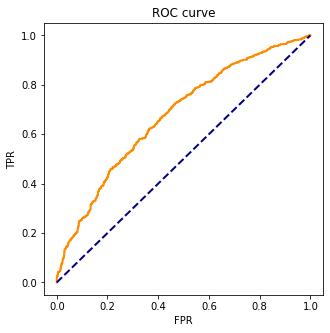

In [48]:
roc_auc_score(valid_y, gridSearch_log.predict_proba(valid_X_pca300)[:,1])

fpr, tpr, _ = roc_curve(valid_y, log_prob_g[:,1])
plt.figure(figsize=[5, 5])
lw = 2

#plt.clf()
plt.plot(fpr, tpr,color='darkorange',
         lw=lw)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')
plt.show()

In [49]:
# Confusion matrices for multiple predictors logistic model. 

# Identify and display confusion matrix for training partition. 
print('Training Partition')
classificationSummary(train_y, gridSearch_log.predict(train_X_pca300))

# Identify and display confusion matrix for validation partition. 
print()
print('Validation Partition')
classificationSummary(valid_y, gridSearch_log.predict(valid_X_pca300))
print(classification_report(valid_y, gridSearch_log.predict(valid_X_pca300)))

Training Partition
Confusion Matrix (Accuracy 0.6967)

       Prediction
Actual    0    1
     0 1093  744
     1  508 1783

Validation Partition
Confusion Matrix (Accuracy 0.6356)

       Prediction
Actual   0   1
     0 432 385
     1 260 693
              precision    recall  f1-score   support

           0       0.62      0.53      0.57       817
           1       0.64      0.73      0.68       953

    accuracy                           0.64      1770
   macro avg       0.63      0.63      0.63      1770
weighted avg       0.63      0.64      0.63      1770



<AxesSubplot:>

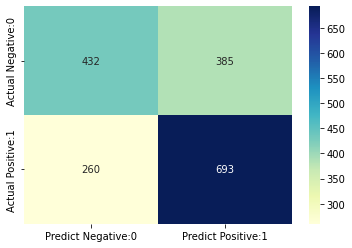

In [50]:
cm = confusion_matrix(valid_y, gridSearch_log.predict(valid_X_pca300))
cm_matrix = pd.DataFrame(data=cm, columns= ['Predict Negative:0','Predict Positive:1'], 
                                 index=[ 'Actual Negative:0','Actual Positive:1'])
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

# KNN Classifier

In [51]:
# Apply NearestNeighbors() function for k=3 in training 
# parition. 
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(train_X_pca300, train_y)

KNeighborsClassifier(n_neighbors=1)

In [52]:
# Make EV intention classification for validation set 
# using EV intention KNN model. 

# Use knn model to classify EV intention
# for validation set.
EV_pred_knn = knn.predict(valid_X_pca300)

# Predict EV intention probabilities p(0), p(1),
# and p(2) for validation set.
EV_pred_prob_knn = np.round(knn.predict_proba(valid_X_pca300), 
                          decimals=4)

# Create data frame to display classification results for
# validation set. 
EV_pred_knn_result = pd.DataFrame({'Actual': valid_y, 
                'p(0)': [p[0] for p in EV_pred_prob_knn],
                'p(1)': [p[1] for p in EV_pred_prob_knn],
                'Classification': EV_pred_knn})

print('Classification for EV intention Data for Validation Partition')
print(EV_pred_knn_result.head(10))

Classification for EV intention Data for Validation Partition
     Actual  p(0)  p(1)  Classification
573       1   0.0   1.0               1
3219      1   0.0   1.0               1
4436      0   1.0   0.0               0
3887      1   1.0   0.0               0
3656      1   0.0   1.0               1
3680      1   1.0   0.0               0
1513      1   0.0   1.0               1
79        1   1.0   0.0               0
4072      1   1.0   0.0               0
3259      0   1.0   0.0               0


In [53]:
#calculate AUC of model
auc = metrics.roc_auc_score(valid_y, knn.predict_proba(valid_X_pca300)[:,1])

#print AUC score
print(auc)

0.7206483166602663


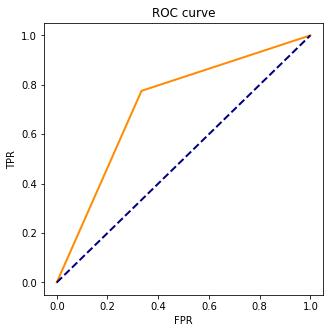

In [54]:
roc_auc_score(valid_y, knn.predict_proba(valid_X_pca300)[:,1])

fpr, tpr, _ = roc_curve(valid_y, EV_pred_prob_knn[:,1])
plt.figure(figsize=[5, 5])
lw = 2

#plt.clf()
plt.plot(fpr, tpr,color='darkorange',
         lw=lw)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')
plt.show()

In [55]:
# Confusion matrices for multiple predictors logistic model. 

# Identify and display confusion matrix for training partition. 
print('Training Partition')
classificationSummary(train_y, knn.predict(train_X_pca300))

# Identify and display confusion matrix for validation partition. 
print()
print('Validation Partition')
classificationSummary(valid_y, knn.predict(valid_X_pca300))
print(classification_report(valid_y, knn.predict(valid_X_pca300)))

Training Partition
Confusion Matrix (Accuracy 1.0000)

       Prediction
Actual    0    1
     0 1837    0
     1    0 2291

Validation Partition
Confusion Matrix (Accuracy 0.7249)

       Prediction
Actual   0   1
     0 544 273
     1 214 739
              precision    recall  f1-score   support

           0       0.72      0.67      0.69       817
           1       0.73      0.78      0.75       953

    accuracy                           0.72      1770
   macro avg       0.72      0.72      0.72      1770
weighted avg       0.72      0.72      0.72      1770



<AxesSubplot:>

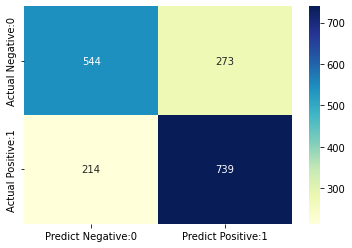

In [56]:
cm = confusion_matrix(valid_y, knn.predict(valid_X_pca300))
cm_matrix = pd.DataFrame(data=cm, columns= ['Predict Negative:0','Predict Positive:1'], 
                                 index=[ 'Actual Negative:0','Actual Positive:1'])
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [57]:
# Identify best k value for number of nearest neighbors using 
# validation partition.

# Develop k-NN classifier using training partition for various
# values of k and then identify accuracy score using validation
# partition. Accuracy score (accuracy) means a probability of 
# correct predictions with the k-NN classifier. 
results = []
for k in range(1, 15):
    # Train knn classifier using training partition.
    knn = KNeighborsClassifier(n_neighbors=k).fit(train_X_pca300, train_y)
    results.append({
        'k': k,
        # For each k, identify accuracy score using validation 
        # partition.
        'Accuracy Score': accuracy_score(valid_y, knn.predict(valid_X_pca300))
    })

# Convert results to a pandas data frame. The smallest k value 
# with the highest accuracy is the best k to apply in k-NN 
# classifier. 
results = pd.DataFrame(results)
print(results)

     k  Accuracy Score
0    1        0.724859
1    2        0.685311
2    3        0.707910
3    4        0.696045
4    5        0.684746
5    6        0.679661
6    7        0.674576
7    8        0.668927
8    9        0.646328
9   10        0.647458
10  11        0.637288
11  12        0.636158
12  13        0.634463
13  14        0.632203


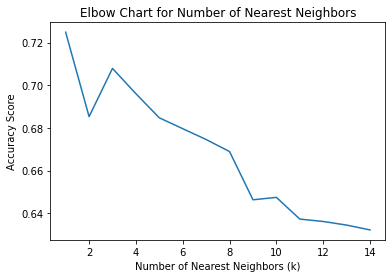

In [58]:
# Develop and display Elbow chart to compare accuracy_score with 
# number of nearest neighbors, k, from 1 to 20. 
ax = results.plot(x='k', y='Accuracy Score')
plt.xlabel('Number of Nearest Neighbors (k)')
plt.ylabel('Accuracy Score')

plt.title('Elbow Chart for Number of Nearest Neighbors')
ax.legend().set_visible(False)
plt.show()

# knn with grid search

In [59]:
# Identify grid search parameters. 
param_grid = {
    'n_neighbors': list(range(1, 31))
}

# Utilize GridSearchCV() to identify the best number 
# of nodes in the hidden layer.
knn_g = KNeighborsClassifier()
gridSearch_knn = GridSearchCV(knn_g, 
                          param_grid, cv=5, n_jobs=-1,scoring='accuracy',return_train_score=True)
gridSearch_knn.fit(train_X_pca300, train_y)

# Display the best score and best parament value.
print(f'Best score:{gridSearch_knn.best_score_:.4f}')
print('Best parameter: ', gridSearch_knn.best_params_)

Best score:0.7011
Best parameter:  {'n_neighbors': 1}


In [60]:
# Make EV intention classification for validation set 
# using EV intention KNN model. 

# Use knn model to classify EV intention
# for validation set.
EV_pred_knn_g = gridSearch_knn.predict(valid_X_pca300)

# Predict EV intention probabilities p(0), p(1),
# and p(2) for validation set.
EV_pred_prob_knn_g = np.round(gridSearch_knn.predict_proba(valid_X_pca300), 
                          decimals=4)

# Create data frame to display classification results for
# validation set. 
EV_pred_knn_result_g = pd.DataFrame({'Actual': valid_y, 
                'p(0)': [p[0] for p in EV_pred_prob_knn_g],
                'p(1)': [p[1] for p in EV_pred_prob_knn_g],
                'Classification': EV_pred_knn_g})

print('Classification for EV intention Data for Validation Partition')
print(EV_pred_knn_result_g.head(10))

Classification for EV intention Data for Validation Partition
     Actual  p(0)  p(1)  Classification
573       1   0.0   1.0               1
3219      1   0.0   1.0               1
4436      0   1.0   0.0               0
3887      1   1.0   0.0               0
3656      1   0.0   1.0               1
3680      1   1.0   0.0               0
1513      1   0.0   1.0               1
79        1   1.0   0.0               0
4072      1   1.0   0.0               0
3259      0   1.0   0.0               0


In [61]:
#calculate AUC of model
auc = metrics.roc_auc_score(valid_y, gridSearch_knn.predict_proba(valid_X_pca300)[:,1])

#print AUC score
print(auc)

0.7206483166602663


In [62]:
# Confusion matrices for multiple predictors logistic model. 

# Identify and display confusion matrix for training partition. 
print('Training Partition')
classificationSummary(train_y, gridSearch_knn.predict(train_X_pca300))

# Identify and display confusion matrix for validation partition. 
print()
print('Validation Partition')
classificationSummary(valid_y, gridSearch_knn.predict(valid_X_pca300))
print(classification_report(valid_y, gridSearch_knn.predict(valid_X_pca300)))

Training Partition
Confusion Matrix (Accuracy 1.0000)

       Prediction
Actual    0    1
     0 1837    0
     1    0 2291

Validation Partition
Confusion Matrix (Accuracy 0.7249)

       Prediction
Actual   0   1
     0 544 273
     1 214 739
              precision    recall  f1-score   support

           0       0.72      0.67      0.69       817
           1       0.73      0.78      0.75       953

    accuracy                           0.72      1770
   macro avg       0.72      0.72      0.72      1770
weighted avg       0.72      0.72      0.72      1770



<AxesSubplot:>

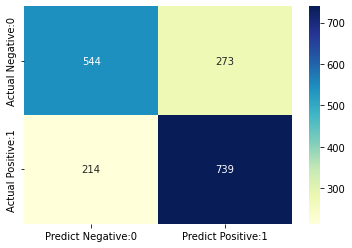

In [63]:
cm = confusion_matrix(valid_y, gridSearch_knn.predict(valid_X_pca300))
cm_matrix = pd.DataFrame(data=cm, columns= ['Predict Negative:0','Predict Positive:1'], 
                                 index=[ 'Actual Negative:0','Actual Positive:1'])
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

## <font color= "Orange">Different Classification Tree Models:
<ol>
  <font color= "Blue"><li>Full Classification tree</li>
      <li>Smaller Classification tree using random controlled parameters</li>
      <li>Smaller Classification tree using Grid Search results</li>
</ol>

In [64]:
# Grow full classification tree using training partition.
fullClassTree = DecisionTreeClassifier()
fullClassTree.fit(train_X_pca300, train_y)

# Using plotDecisionTree() to visualize the full tree.
plotDecisionTree(fullClassTree, feature_names=train_X_pca300.columns)

In [65]:
# Indetify and display number of nodes in the tree.
tree_nodes = fullClassTree.tree_.node_count
print('Number of nodes:', tree_nodes)

Number of nodes: 943


In [66]:
#calculate AUC of model
auc = metrics.roc_auc_score(valid_y, fullClassTree.predict_proba(valid_X_pca300)[:,1])

#print AUC score
print(auc)

0.5673708356398207


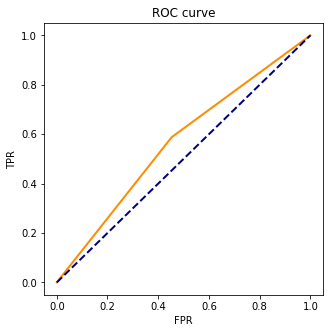

In [67]:
roc_auc_score(valid_y, fullClassTree.predict_proba(valid_X_pca300)[:,1])

fpr, tpr, _ = roc_curve(valid_y, fullClassTree.predict_proba(valid_X_pca300)[:,1])
plt.figure(figsize=[5, 5])
lw = 2

#plt.clf()
plt.plot(fpr, tpr,color='darkorange',
         lw=lw)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')
plt.show()

In [68]:
# Confusion matrices for full classification tree. 

# Identify  and display confusion matrix for training partition. 
print('Training Partition')
classificationSummary(train_y, fullClassTree.predict(train_X_pca300))

# Identify  and display confusion matrix for validation partition. 
print()
print('Validation Partition')
classificationSummary(valid_y, fullClassTree.predict(valid_X_pca300))
print(classification_report(valid_y, fullClassTree.predict(valid_X_pca300)))

#its a measure for classifictaion measurement
#o means non acceptance and 1 means accept
#287 predicted one and 2713 non accepr
#in valid,98% predicted correctly.1794 predicted correctly and 
#13 predicted incorrrectly(non accepted 13 predicted as accepted)
#166 predicted correctly and 27 predicted incorrectly
#down diagonal correct preedicton and other diagonal is incorrect

# accuracy=1794+166/2000=0.98
# misclassification(error)=27+13/2000=1-accuracy=0.02= 2%
#give idea of how many records are predicted coreect and incorrect in matrix

Training Partition
Confusion Matrix (Accuracy 1.0000)

       Prediction
Actual    0    1
     0 1837    0
     1    0 2291

Validation Partition
Confusion Matrix (Accuracy 0.5689)

       Prediction
Actual   0   1
     0 447 370
     1 393 560
              precision    recall  f1-score   support

           0       0.53      0.55      0.54       817
           1       0.60      0.59      0.59       953

    accuracy                           0.57      1770
   macro avg       0.57      0.57      0.57      1770
weighted avg       0.57      0.57      0.57      1770



<AxesSubplot:>

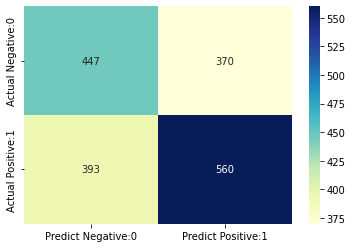

In [69]:
cm = confusion_matrix(valid_y, fullClassTree.predict(valid_X_pca300))
cm_matrix = pd.DataFrame(data=cm, columns= ['Predict Negative:0','Predict Positive:1'], 
                                 index=[ 'Actual Negative:0','Actual Positive:1'])
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

## Smaller classification tree using DecisionTreeClassifier() control parameters

Small Classification Tree with Control Parameters


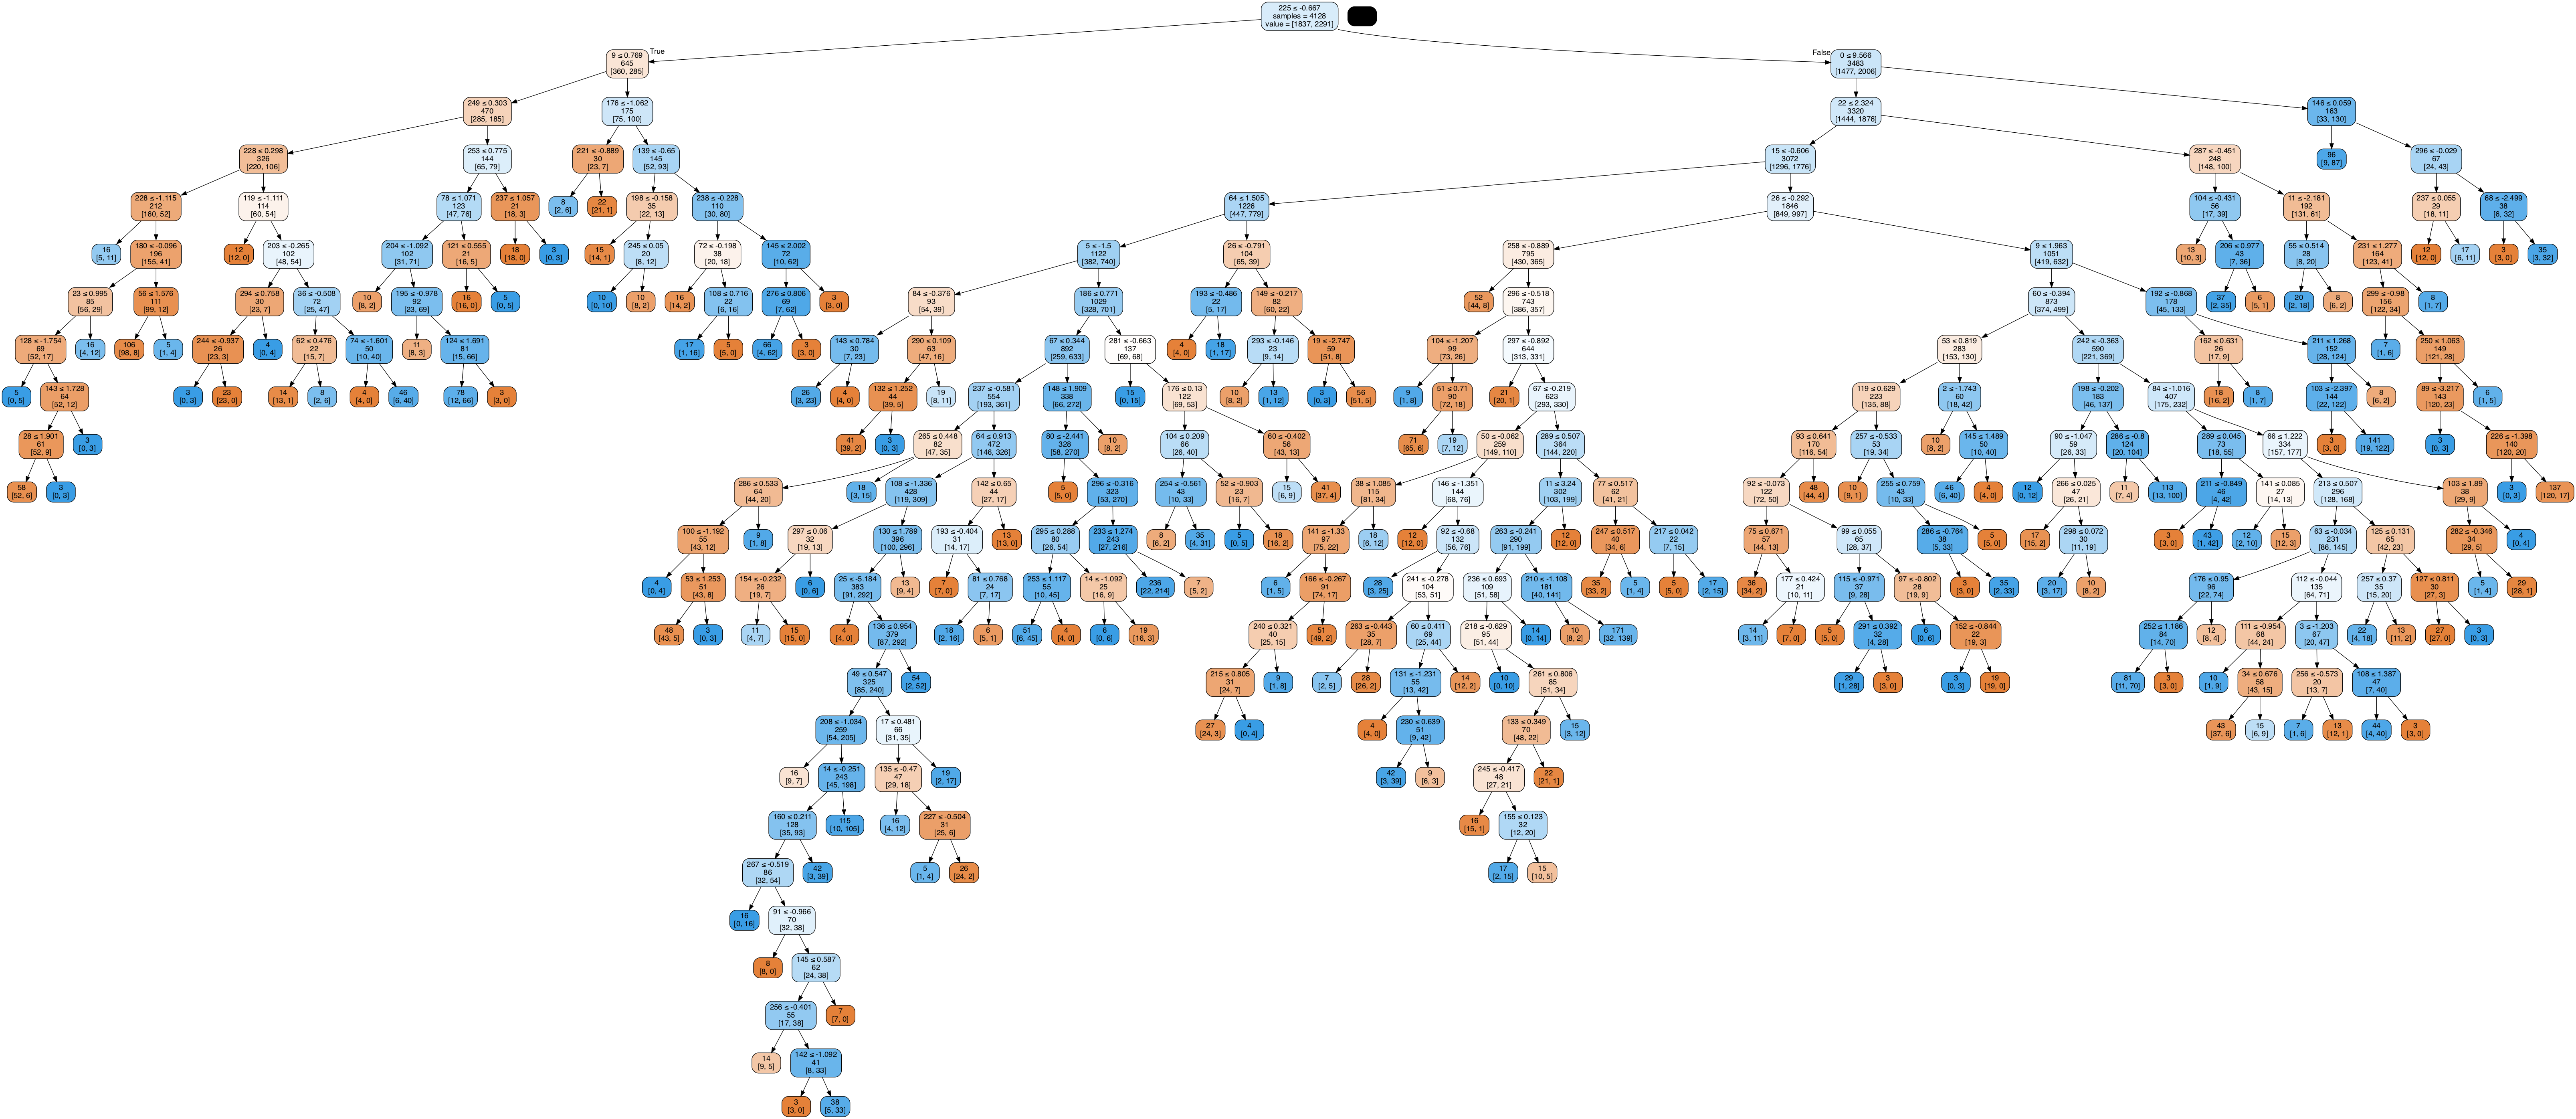

In [70]:
# Create a smaller classification tree for training partition
# using DecisionTreeClassifier() function control parameters:
#  - Maximum Tree depth (number of splits) = 20;
#  - Minimum impurity decrease per split = 0 
#  - Minimum number of sample records in a node for splitting = 30.   
smallClassTree = DecisionTreeClassifier(max_depth=30, 
        min_impurity_decrease=0.001, min_samples_split=20)
smallClassTree.fit(train_X_pca300, train_y)

# Display classification tree for training partition.
print('Small Classification Tree with Control Parameters')
plotDecisionTree(smallClassTree, feature_names=train_X_pca300.columns)

In [71]:
#calculate AUC of model
auc = metrics.roc_auc_score(valid_y, smallClassTree.predict_proba(valid_X_pca300)[:,1])

#print AUC score
print(auc)

0.5677554999287183


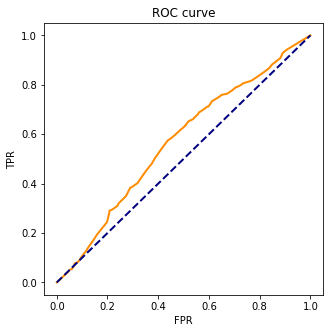

In [72]:
roc_auc_score(valid_y, smallClassTree.predict_proba(valid_X_pca300)[:,1])

fpr, tpr, _ = roc_curve(valid_y, smallClassTree.predict_proba(valid_X_pca300)[:,1])
plt.figure(figsize=[5, 5])
lw = 2

#plt.clf()
plt.plot(fpr, tpr,color='darkorange',
         lw=lw)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')
plt.show()

In [73]:
# Confusion matrices for smaller classification tree. 

# Identify  and display confusion matrix for training partition. 
print('Training Partition for Smaller Tree with control parameters')
classificationSummary(train_y, smallClassTree.predict(train_X_pca300))

# Identify  and display confusion matrix for validation partition. 
print()
print('Validation Partition for Smaller Tree with control parameters')
classificationSummary(valid_y, smallClassTree.predict(valid_X_pca300))
print(classification_report(valid_y, smallClassTree.predict(valid_X_pca300)))


Training Partition for Smaller Tree with control parameters
Confusion Matrix (Accuracy 0.8871)

       Prediction
Actual    0    1
     0 1544  293
     1  173 2118

Validation Partition for Smaller Tree with control parameters
Confusion Matrix (Accuracy 0.5695)

       Prediction
Actual   0   1
     0 404 413
     1 349 604
              precision    recall  f1-score   support

           0       0.54      0.49      0.51       817
           1       0.59      0.63      0.61       953

    accuracy                           0.57      1770
   macro avg       0.57      0.56      0.56      1770
weighted avg       0.57      0.57      0.57      1770



<AxesSubplot:>

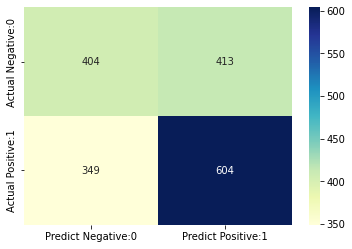

In [74]:
cm = confusion_matrix(valid_y, smallClassTree.predict(valid_X_pca300))
cm_matrix = pd.DataFrame(data=cm, columns= ['Predict Negative:0','Predict Positive:1'], 
                                 index=[ 'Actual Negative:0','Actual Positive:1'])
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

## Smaller Classification tree using Grid Search results

In [75]:
# Improve grid search parameters by adapting grid based 
# on results from initial grid search parameters.
param_grid = {
    'max_depth': list(range(10, 30)),  
    'min_impurity_decrease': [0.0005,0, 0.001], 
    'min_samples_split': list(range(10, 30)),
}

# Apply GridSearchCV() fucntion for various combinations of
# DecisionTreeClassifier() improved parameters. 
gridSearch = GridSearchCV(DecisionTreeClassifier(), 
                param_grid, cv=5, n_jobs=-1)
gridSearch.fit(train_X_pca300, train_y)

# Display best improved paramenters of classification tree. 
print()
print(f'Improved score:{gridSearch.best_score_:.4f}')
print('Improved parameters: ', gridSearch.best_params_)

KeyboardInterrupt: 

In [ ]:
# Create classification tree based on the improved parameters.
bestClassTree = gridSearch.best_estimator_

# Display classification tree based on improved parameters
print('Best Classification Tree with Grid Search')
plotDecisionTree(bestClassTree, feature_names=train_X_pca300.columns)

In [ ]:
# Identify and display number of nodes in the tree
# based on grid search.
tree_nodes_grid = bestClassTree.tree_.node_count
print('Number of nodes:', tree_nodes_grid)

In [ ]:
#calculate AUC of model
auc = metrics.roc_auc_score(valid_y, gridSearch.predict_proba(valid_X_pca300)[:,1])

#print AUC score
print(auc)

In [ ]:
roc_auc_score(valid_y, gridSearch.predict_proba(valid_X_pca300)[:,1])

fpr, tpr, _ = roc_curve(valid_y, gridSearch.predict_proba(valid_X_pca300)[:,1])
plt.figure(figsize=[5, 5])
lw = 2

#plt.clf()
plt.plot(fpr, tpr,color='darkorange',
         lw=lw)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')
plt.show()

In [ ]:
# Confusion matrices for grid search classification tree. 

# Identify and display confusion matrix for training partition. 
print('Training Partition for classification tree based on grid search')
classificationSummary(train_y, bestClassTree.predict(train_X_pca300))

# Identify and display confusion matrix for validation partition. 
print()
print('Validation Partition for classification tree based on grid search')
classificationSummary(valid_y, bestClassTree.predict(valid_X_pca300))
print(classification_report(valid_y, bestClassTree.predict(valid_X_pca300)))

In [ ]:
cm = confusion_matrix(valid_y, bestClassTree.predict(valid_X_s))
cm_matrix = pd.DataFrame(data=cm, columns= ['Predict Negative:0','Predict Positive:1'], 
                                 index=[ 'Actual Negative:0','Actual Positive:1'])
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

## Random Forest trees

In [76]:
# Apply RandomForestClassifier() function to develop a combined
# (ensemble) classification tree using Random Forest algorithm.
rf = RandomForestClassifier(n_estimators=1000, random_state=1)
rf.fit(train_X_pca300, train_y)

# Display number of nodes in Random Forest trees.
n_nodes = rf.estimators_[0].tree_.node_count
print('Number of Nodes in Tree in Random Forest:', n_nodes)

Number of Nodes in Tree in Random Forest: 941


In [77]:
#calculate AUC of model
auc = metrics.roc_auc_score(valid_y, rf.predict_proba(valid_X_pca300)[:,1])

#print AUC score
print(auc)

0.7761029076510305


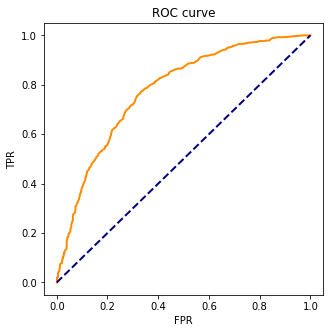

In [78]:
roc_auc_score(valid_y, rf.predict_proba(valid_X_pca300)[:,1])

fpr, tpr, _ = roc_curve(valid_y, rf.predict_proba(valid_X_pca300)[:,1])
plt.figure(figsize=[5, 5])
lw = 2

#plt.clf()
plt.plot(fpr, tpr,color='darkorange',
         lw=lw)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')
plt.show()

In [79]:
# Confusion matrices for Random Forest classification. 

# Identify  and display confusion matrix for training partition. 
print('Training Partition for Random Forest Tree')
classificationSummary(train_y, rf.predict(train_X_pca300))

# Identify  and display confusion matrix for validation partition. 
print()
print('Validation Partition for Random Forest Tree')
classificationSummary(valid_y, rf.predict(valid_X_pca300))
print(classification_report(valid_y, rf.predict(valid_X_pca300)))


Training Partition for Random Forest Tree
Confusion Matrix (Accuracy 1.0000)

       Prediction
Actual    0    1
     0 1837    0
     1    0 2291

Validation Partition for Random Forest Tree
Confusion Matrix (Accuracy 0.7017)

       Prediction
Actual   0   1
     0 417 400
     1 128 825
              precision    recall  f1-score   support

           0       0.77      0.51      0.61       817
           1       0.67      0.87      0.76       953

    accuracy                           0.70      1770
   macro avg       0.72      0.69      0.68      1770
weighted avg       0.72      0.70      0.69      1770



<AxesSubplot:title={'center':'Confusion Matrix'}>

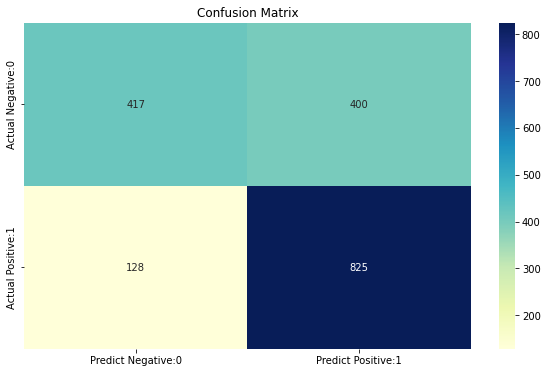

In [80]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_title('Confusion Matrix')
cm = confusion_matrix(valid_y, rf.predict(valid_X_pca300))
cm_matrix = pd.DataFrame(data=cm, columns= ['Predict Negative:0','Predict Positive:1'], 
                                 index=[ 'Actual Negative:0','Actual Positive:1'])
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

# random forest with grid search

In [82]:
# Improve grid search parameters by adapting grid based 
# on results from initial grid search parameters.
param_grid = {
    'max_depth': list(range(10, 30)),  
    'min_impurity_decrease': [0.0005, 0.001], 
    'min_samples_split': list(range(10, 30)),
    #'min_samples_leaf': list(range(1,3)),
    #'max_samples': [0.7]
    'random_state':[1]
}

# Apply GridSearchCV() fucntion for various combinations of
# DecisionTreeClassifier() improved parameters. 
gridSearch_rand = GridSearchCV(RandomForestClassifier(), 
                param_grid, cv=5, n_jobs=-1)
gridSearch_rand.fit(train_X_pca300, train_y)

# Display best improved paramenters of classification tree. 
print()
print(f'Improved score:{gridSearch_rand.best_score_:.4f}')
print('Improved parameters: ', gridSearch_rand.best_params_)

KeyboardInterrupt: 

In [ ]:
# Create classification tree based on the improved parameters.
bestrandTree = gridSearch_rand.best_estimator_


In [ ]:
# Display number of nodes in Random Forest trees.
n_nodes_r = bestrandTree.estimators_[0].tree_.node_count
print('Number of Nodes in Tree in Random Forest:', n_nodes_r)

In [ ]:
#calculate AUC of model
auc = metrics.roc_auc_score(valid_y, gridSearch_rand.predict_proba(valid_X_pca300)[:,1])

#print AUC score
print(auc)

In [ ]:
roc_auc_score(valid_y, gridSearch_rand.predict_proba(valid_X_pca300)[:,1])

fpr, tpr, _ = roc_curve(valid_y, gridSearch_rand.predict_proba(valid_X_pca300)[:,1])
plt.figure(figsize=[5, 5])
lw = 2

#plt.clf()
plt.plot(fpr, tpr,color='darkorange',
         lw=lw)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')
plt.show()

In [ ]:
# Confusion matrices for Random Forest classification. 

# Identify  and display confusion matrix for training partition. 
print('Training Partition for Random Forest Tree')
classificationSummary(train_y, gridSearch_rand.predict(train_X_pca300))

# Identify  and display confusion matrix for validation partition. 
print()
print('Validation Partition for Random Forest Tree')
classificationSummary(valid_y, gridSearch_rand.predict(valid_X_pca300))
print(classification_report(valid_y, gridSearch_rand.predict(valid_X_pca300)))

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_title('Confusion Matrix')
cm = confusion_matrix(valid_y, gridSearch_rand.predict(valid_X_pca300))
cm_matrix = pd.DataFrame(data=cm, columns= ['Predict Negative:0','Predict Positive:1'], 
                                 index=[ 'Actual Negative:0','Actual Positive:1'])
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

## Boosted Tree

In [83]:
# Apply GradientBoostingClassifier() function to develop a combined
# boosted tree.  
boost = GradientBoostingClassifier(learning_rate=0.05, n_estimators=500, random_state=1,
                           subsample=0.7)
boost.fit(train_X_pca300, train_y)

GradientBoostingClassifier(learning_rate=0.05, n_estimators=500, random_state=1,
                           subsample=0.7)

In [84]:
#calculate AUC of model
auc = metrics.roc_auc_score(valid_y, boost.predict_proba(valid_X_pca300)[:,1])

#print AUC score
print(auc)

0.7410637797793735


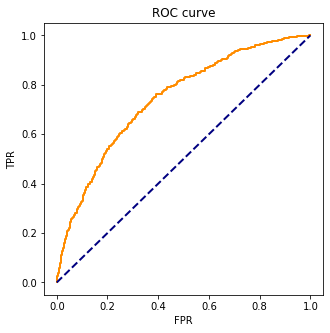

In [85]:
roc_auc_score(valid_y, boost.predict_proba(valid_X_pca300)[:,1])

fpr, tpr, _ = roc_curve(valid_y, boost.predict_proba(valid_X_pca300)[:,1])
plt.figure(figsize=[5, 5])
lw = 2

#plt.clf()
plt.plot(fpr, tpr,color='darkorange',
         lw=lw)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')
plt.show()

In [86]:
# Confusion matrices for Boosted Tree classification. 

# Identify  and show confusion matrix for training partition. 
print('Training Partition for Boosted Tree')
classificationSummary(train_y, boost.predict(train_X_pca300))

# Identify  and show confusion matrix for validation partition. 
print()
print('Validation Partition for Boosted Tree')
classificationSummary(valid_y, boost.predict(valid_X_pca300))
print(classification_report(valid_y, boost.predict(valid_X_pca300)))

Training Partition for Boosted Tree
Confusion Matrix (Accuracy 0.9641)

       Prediction
Actual    0    1
     0 1715  122
     1   26 2265

Validation Partition for Boosted Tree
Confusion Matrix (Accuracy 0.6836)

       Prediction
Actual   0   1
     0 469 348
     1 212 741
              precision    recall  f1-score   support

           0       0.69      0.57      0.63       817
           1       0.68      0.78      0.73       953

    accuracy                           0.68      1770
   macro avg       0.68      0.68      0.68      1770
weighted avg       0.68      0.68      0.68      1770



<AxesSubplot:>

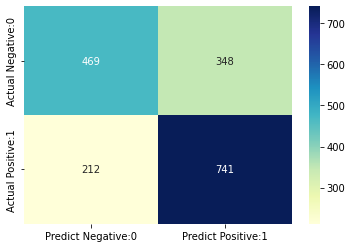

In [87]:
cm = confusion_matrix(valid_y, boost.predict(valid_X_pca300))
cm_matrix = pd.DataFrame(data=cm, columns= ['Predict Negative:0','Predict Positive:1'], 
                                 index=[ 'Actual Negative:0','Actual Positive:1'])
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

# boosted tree with grid search

In [ ]:
# Improve grid search parameters by adapting grid based 
# on results from initial grid search parameters.
param_grid = {
    'max_depth': list(range(10, 30)),  
    'min_impurity_decrease': [0.0005, 0.001], 
    'min_samples_split': list(range(10, 30)),
    #'min_samples_leaf': list(range(1,3)),
    'subsample': [0.7], 
    'learning_rate': [0.05],
    #'n_estimators': [200] , 
    'random_state': [1] 
}

# Apply GridSearchCV() fucntion for various combinations of
# GradientBoostingClassifier() improved parameters. 
gridSearch_boost = GridSearchCV(GradientBoostingClassifier(), 
                param_grid, cv=5, n_jobs=-1)
gridSearch_boost.fit(train_X_pca300, train_y)

# Display best improved paramenters of classification tree. 
#print()
#print(f'Improved score:{gridSearch_boost.best_score_:.4f}')
#print('Improved parameters: ', gridSearch_boost.best_params_)

In [ ]:
#calculate AUC of model
auc = metrics.roc_auc_score(valid_y, gridSearch_boost.predict_proba(valid_X_pca200)[:,1])

#print AUC score
print(auc)

In [ ]:
roc_auc_score(valid_y, gridSearch_boost.predict_proba(valid_X_pca300)[:,1])

fpr, tpr, _ = roc_curve(valid_y, gridSearch_boost.predict_proba(valid_X_pca300)[:,1])
plt.figure(figsize=[5, 5])
lw = 2

#plt.clf()
plt.plot(fpr, tpr,color='darkorange',
         lw=lw)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')
plt.show()

In [ ]:
# Confusion matrices for Boosted Tree classification. 

# Identify  and show confusion matrix for training partition. 
print('Training Partition for Boosted Tree')
classificationSummary(train_y, gridSearch_boost.predict(train_X_pca300))

# Identify  and show confusion matrix for validation partition. 
print()
print('Validation Partition for Boosted Tree')
classificationSummary(valid_y, gridSearch_boost.predict(valid_X_pca300))
print(classification_report(valid_y, gridSearch_boost.predict(valid_X_pca300)))

In [ ]:
cm = confusion_matrix(valid_y, gridSearch_boost.predict(valid_X_pca300))
cm_matrix = pd.DataFrame(data=cm, columns= ['Predict Negative:0','Predict Positive:1'], 
                                 index=[ 'Actual Negative:0','Actual Positive:1'])
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

# xgboost

In [88]:
xgbc = XGBClassifier(random_state=1,
                n_estimators=500,                
                learning_rate=0.05,      
                subsample=0.7,booster='gbtree')
#print(xgbc)
#XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
#       colsample_bynode=1, colsample_bytree=1, gamma=0, learning_rate=0.1,
#       max_delta_step=0, max_depth=3, min_child_weight=1, missing=None,
#       n_estimators=100, n_jobs=1, nthread=None,
#       objective='multi:softprob', random_state=0, reg_alpha=0,
#      reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
#      subsample=1, verbosity=1)
xgbc.fit(train_X_pca300, train_y)

XGBClassifier(base_score=None, booster='gbtree', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=500, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=1, ...)

In [89]:
#calculate AUC of model
auc = metrics.roc_auc_score(valid_y, xgbc.predict_proba(valid_X_pca300)[:,1])

#print AUC score
print(auc)

0.7786273071830114


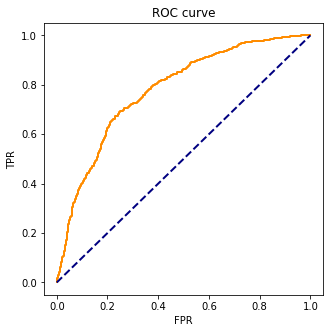

In [90]:
roc_auc_score(valid_y, xgbc.predict_proba(valid_X_pca300)[:,1])

fpr, tpr, _ = roc_curve(valid_y, xgbc.predict_proba(valid_X_pca300)[:,1])
plt.figure(figsize=[5, 5])
lw = 2

#plt.clf()
plt.plot(fpr, tpr,color='darkorange',
         lw=lw)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')
plt.show()

In [91]:
# Confusion matrices for XGBoosted Tree classification. 

# Identify  and show confusion matrix for training partition. 
print('Training Partition for XGBoosted Tree')
classificationSummary(train_y, xgbc.predict(train_X_pca300))

# Identify  and show confusion matrix for validation partition. 
print()
print('Validation Partition for XGBoosted Tree')
classificationSummary(valid_y, xgbc.predict(valid_X_pca300))
print(classification_report(valid_y, xgbc.predict(valid_X_pca300)))

Training Partition for XGBoosted Tree
Confusion Matrix (Accuracy 1.0000)

       Prediction
Actual    0    1
     0 1837    0
     1    0 2291

Validation Partition for XGBoosted Tree
Confusion Matrix (Accuracy 0.7147)

       Prediction
Actual   0   1
     0 507 310
     1 195 758
              precision    recall  f1-score   support

           0       0.72      0.62      0.67       817
           1       0.71      0.80      0.75       953

    accuracy                           0.71      1770
   macro avg       0.72      0.71      0.71      1770
weighted avg       0.72      0.71      0.71      1770



<AxesSubplot:>

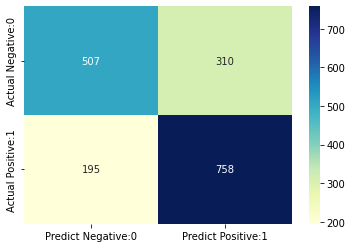

In [92]:
cm = confusion_matrix(valid_y, xgbc.predict(valid_X_pca300))
cm_matrix = pd.DataFrame(data=cm, columns= ['Predict Negative:0','Predict Positive:1'], 
                                 index=[ 'Actual Negative:0','Actual Positive:1'])
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [ ]:
# from numpy import sort
# from sklearn.feature_selection import SelectFromModel
# from sklearn.metrics import accuracy_score
# import xgboost as xgb
# from xgboost import plot_importance
# from matplotlib import pyplot
# from sklearn.metrics import cohen_kappa_score

In [ ]:
# fig, ax = plt.subplots(figsize=(10,10))
# xgb.plot_importance(xgbc, max_num_features=20, height=0.5, ax=ax,importance_type='gain')
# plt.show()

In [ ]:
# threshold = np.sort(xgbc.feature_importances_)[:20]
# for thresh in threshold:
#     # select features using threshold
#     selection = SelectFromModel(xgbc, threshold=thresh, prefit=True)
#     select_X_train = selection.transform(train_X_p)
#     # train model
#     selection_model = XGBClassifier()
#     selection_model.fit(select_X_train, train_y)
#     # eval model
#     select_X_test = selection.transform(valid_X_p)
#     y_pred = selection_model.predict(select_X_test)
#     predictions = [round(value) for value in y_pred]
#     accuracy = cohen_kappa_score(valid_y, predictions)
#     print("Thresh=%.3f, n=%d, cohen kappa score: %.2f%%" % (thresh, select_X_train.shape[1], accuracy*100.0))

In [ ]:
# # Fit model using each importance as a threshold
# thresholds = sort(xgbc.feature_importances_)
# for thresh in thresholds:
# 	# select features using threshold
# 	selection = SelectFromModel(xgbc, threshold=thresh, prefit=True)
# 	select_X_train = selection.transform(train_X_p)
# 	# train model
# 	selection_model = MyXGBClassifier()
# 	selection_model.fit(select_X_train, train_y)
# 	# eval model
# 	select_X_test = selection.transform(valid_X_p)
# 	y_pred = selection_model.predict(select_X_test)
# 	predictions = [round(value) for value in y_pred]
# 	accuracy = accuracy_score(valid_y, predictions)
# 	print("Thresh=%.3f, n=%d, Accuracy: %.2f%%" % (thresh, select_X_train.shape[1], accuracy*100.0))

# XGBoost with grid search

In [104]:
# Improve grid search parameters by adapting grid based 
# on results from initial grid search parameters.
param_grid = {
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'reg_lambda': [1, 3, 5, 10] 
}

# Apply GridSearchCV() fucntion for various combinations of
# GradientBoostingClassifier() improved parameters. 
gridSearch_XGboost = GridSearchCV(XGBClassifier(n_estimators=500,reg_alpha = 1,max_depth=6,learning_rate=0.05,      
                subsample=0.7,booster='gbtree',random_state=1), 
                param_grid, cv=5, n_jobs=-1)
gridSearch_XGboost.fit(train_X_pca300, train_y)

# Display best improved paramenters of classification tree. 
print()
print(f'Improved score:{gridSearch_XGboost.best_score_:.4f}')
print('Improved parameters: ', gridSearch_XGboost.best_params_)


Improved score:0.6989
Improved parameters:  {'learning_rate': 0.05, 'reg_lambda': 1}


In [105]:
#calculate AUC of model
auc = metrics.roc_auc_score(valid_y, gridSearch_XGboost.predict_proba(valid_X_pca300)[:,1])

#print AUC score
print(auc)

0.7628413012569981


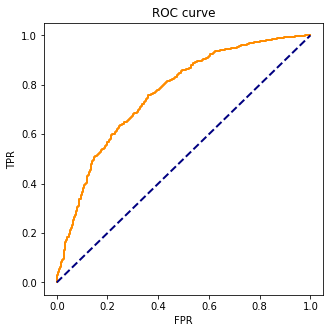

In [106]:
roc_auc_score(valid_y, gridSearch_XGboost.predict_proba(valid_X_pca300)[:,1])

fpr, tpr, _ = roc_curve(valid_y, gridSearch_XGboost.predict_proba(valid_X_pca300)[:,1])
plt.figure(figsize=[5, 5])
lw = 2

#plt.clf()
plt.plot(fpr, tpr,color='darkorange',
         lw=lw)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')
plt.show()

In [107]:
# Confusion matrices for XGBoosted Tree classification. 

# Identify  and show confusion matrix for training partition. 
print('Training Partition for XGBoosted Tree')
classificationSummary(train_y, gridSearch_XGboost.predict(train_X_pca300))

# Identify  and show confusion matrix for validation partition. 
print()
print('Validation Partition for XGBoosted Tree')
classificationSummary(valid_y, gridSearch_XGboost.predict(valid_X_pca300))
print(classification_report(valid_y, gridSearch_XGboost.predict(valid_X_pca300)))

Training Partition for XGBoosted Tree
Confusion Matrix (Accuracy 1.0000)

       Prediction
Actual    0    1
     0 1837    0
     1    0 2291

Validation Partition for XGBoosted Tree
Confusion Matrix (Accuracy 0.6966)

       Prediction
Actual   0   1
     0 492 325
     1 212 741
              precision    recall  f1-score   support

           0       0.70      0.60      0.65       817
           1       0.70      0.78      0.73       953

    accuracy                           0.70      1770
   macro avg       0.70      0.69      0.69      1770
weighted avg       0.70      0.70      0.69      1770



<AxesSubplot:>

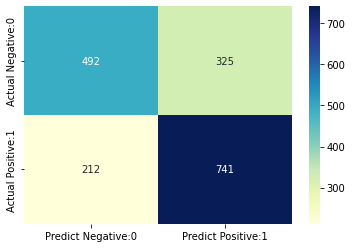

In [108]:
cm = confusion_matrix(valid_y, gridSearch_XGboost.predict(valid_X_pca300))
cm_matrix = pd.DataFrame(data=cm, columns= ['Predict Negative:0','Predict Positive:1'], 
                                 index=[ 'Actual Negative:0','Actual Positive:1'])
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

# LightGBM

In [93]:
lgbmc = LGBMClassifier(random_state=1,
                n_estimators=500,                
                learning_rate=0.05,      
                subsample=0.7)
lgbmc.fit(train_X_pca300, train_y)


LGBMClassifier(learning_rate=0.05, n_estimators=500, random_state=1,
               subsample=0.7)

In [94]:
#calculate AUC of model
auc = metrics.roc_auc_score(valid_y, lgbmc.predict_proba(valid_X_pca300)[:,1])

#print AUC score
print(auc)

0.7717226153061709


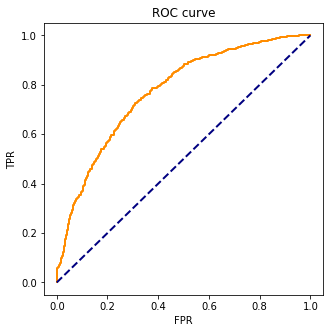

In [95]:
roc_auc_score(valid_y, lgbmc.predict_proba(valid_X_pca300)[:,1])

fpr, tpr, _ = roc_curve(valid_y, lgbmc.predict_proba(valid_X_pca300)[:,1])
plt.figure(figsize=[5, 5])
lw = 2

#plt.clf()
plt.plot(fpr, tpr,color='darkorange',
         lw=lw)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')
plt.show()

In [96]:
classificationSummary(train_y, lgbmc.predict(train_X_pca300))

classificationSummary(valid_y, lgbmc.predict(valid_X_pca300))
print(classification_report(valid_y, lgbmc.predict(valid_X_pca300)))

Confusion Matrix (Accuracy 1.0000)

       Prediction
Actual    0    1
     0 1837    0
     1    0 2291
Confusion Matrix (Accuracy 0.7045)

       Prediction
Actual   0   1
     0 491 326
     1 197 756
              precision    recall  f1-score   support

           0       0.71      0.60      0.65       817
           1       0.70      0.79      0.74       953

    accuracy                           0.70      1770
   macro avg       0.71      0.70      0.70      1770
weighted avg       0.71      0.70      0.70      1770



<AxesSubplot:>

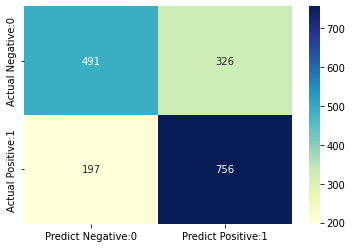

In [97]:
cm = confusion_matrix(valid_y, lgbmc.predict(valid_X_pca300))
cm_matrix = pd.DataFrame(data=cm, columns= ['Predict Negative:0','Predict Positive:1'], 
                                 index=[ 'Actual Negative:0','Actual Positive:1'])
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

# LightGBM with Gridsearch

In [ ]:
# Improve grid search parameters by adapting grid based 
# on results from initial grid search parameters.
param_grid = {
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'reg_lambda': [1, 3, 5, 10] 
}

# Apply GridSearchCV() fucntion for various combinations of
# GradientBoostingClassifier() improved parameters. 
gridSearch_LGBM = GridSearchCV(LGBMClassifier(n_estimators=500,reg_alpha = 1,max_depth=6,learning_rate=0.05,      
                subsample=0.7,booster='gbtree',random_state=1), 
                param_grid, cv=5, n_jobs=-1)
gridSearch_LGBM.fit(train_X_pca300, train_y)

# Display best improved paramenters of classification tree. 
print()
print(f'Improved score:{gridSearch_LGBM.best_score_:.4f}')
print('Improved parameters: ', gridSearch_LGBM.best_params_)

In [ ]:
#calculate AUC of model
auc = metrics.roc_auc_score(valid_y, gridSearch_LGBM.predict_proba(valid_X_pca300)[:,1])

#print AUC score
print(auc)

In [ ]:
roc_auc_score(valid_y, gridSearch_LGBM.predict_proba(valid_X_pca300)[:,1])

fpr, tpr, _ = roc_curve(valid_y, gridSearch_LGBM.predict_proba(valid_X_pca300)[:,1])
plt.figure(figsize=[5, 5])
lw = 2

#plt.clf()
plt.plot(fpr, tpr,color='darkorange',
         lw=lw)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')
plt.show()

In [ ]:
classificationSummary(train_y, gridSearch_LGBM.predict(train_X_pca300))

classificationSummary(valid_y, gridSearch_LGBM.predict(valid_X_pca300))
print(classification_report(valid_y, gridSearch_LGBM.predict(valid_X_pca300)))

In [ ]:
cm = confusion_matrix(valid_y, gridSearch_LGBM.predict(valid_X_pca300))
cm_matrix = pd.DataFrame(data=cm, columns= ['Predict Negative:0','Predict Positive:1'], 
                                 index=[ 'Actual Negative:0','Actual Positive:1'])
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

## Neural Network Model

## <font color= "Orange">Different Neural Network Models:
<ol>
  <font color= "Blue"><li>Neural Network Model using multiple Predictors</li>
      <li>Neural Network Model Based on Grid Search</li>
</ol>

## Neural network Model 

In [98]:
# Create outcome and predictors to run neural network
# model.
#outcome = 'bichoice'
#drop = ['bichoice','highway','town','state','home_park']
#predictors = [c for c in EV_intention_df.columns if c != drop]


# Create predictors and outcome variables.  
#X = EV_intention_df.drop(columns=['bichoice','state','zipcode'])
#y = EV_intention_df['bichoice']

# Partition data into training (60% or 0.6) and validation(40% or 0.4)
# of the EV_intention_df data frame.
#train_X, valid_X, train_y, valid_y = train_test_split(X, y, 
#                            test_size=0.2, random_state=1)

# Use MLPCclassifier() function to train neural network model.
# Apply: 
# (a) default input layer with the number of nodes equal 
#     to number of predictor variables (20); 
# (b) single hidden layer with 3 nodes (default is 2); 
# (c) default output layer with the number nodes equal
#     to number of classes in outcome variable (2);
# (d) 'logistic' activation function;
# (e) solver = 'lbfgs', which is applied for small data 
#     sets for better performance and fast convergence. 
#     For large data sets, apply default solver = 'adam'. 
EV_intention_clf = MLPClassifier(hidden_layer_sizes=(3), max_iter=10000,activation='logistic',
                    solver='lbfgs', random_state=1)
EV_intention_clf.fit(train_X_pca300, train_y)

# Display network structure with the final values of 
# intercepts (Theta) and weights (W).
print('Final Intercepts for EV intention Neural Network Model')
print(EV_intention_clf.intercepts_)

print()
print('Network Weights for EV intention Neural Network Model')
print(EV_intention_clf.coefs_)

Final Intercepts for EV intention Neural Network Model
[array([ 0.87193709,  4.85580445, -5.89461142]), array([1.58298688])]

Network Weights for EV intention Neural Network Model
[array([[ 4.24495877e+00, -4.31890417e+00, -2.42215530e+01],
       [-2.58216359e+01, -1.30505259e+01,  1.58532869e+01],
       [-9.23334903e+00, -8.37364430e+00, -2.01947498e+00],
       [-2.37021303e+00, -4.16361695e+00,  2.24178295e+01],
       [-3.96064667e+00,  7.64957837e+00,  1.99753392e+00],
       [ 9.63924102e+00,  5.90609327e+00, -3.17511131e+00],
       [-5.17429699e+00,  1.12801940e+01, -1.10662794e+01],
       [-4.95000569e+00, -7.21460830e-02,  1.37746446e+01],
       [-2.09116630e+01,  9.44162541e+00,  5.21002304e-01],
       [ 2.73609595e+01, -1.14100530e+01,  2.65499245e+00],
       [ 3.69608289e+00,  4.36114121e+00, -1.34741126e+01],
       [-1.09609274e+01,  3.40273053e-01, -2.28944933e+00],
       [-3.55541724e+00, -3.36993068e+00,  4.21698599e+00],
       [ 6.04217894e+00,  8.06677190e+0

In [99]:
# Make Ev intention classification for validation set 
# using EV intention neural network model. 

# Use EV_intention_clf model to classify EV intention
# for validation set.
EV_Intention_pred = EV_intention_clf.predict(valid_X_pca300)

# Predict target probabilities p(0), p(1),
# and p(2) for validation set.
EV_pred_prob = np.round(EV_intention_clf.predict_proba(valid_X_pca300), 
                          decimals=4)

# Create data frame to display classification results for
# validation set. 
EV_pred_result = pd.DataFrame({'Actual': valid_y, 
                'p(0)': [p[0] for p in EV_pred_prob],
                'p(1)': [p[1] for p in EV_pred_prob],
                'Classification': EV_Intention_pred})

print('Classification for EV intention data for Validation Partition')
print(EV_pred_result.head(10))

Classification for EV intention data for Validation Partition
     Actual    p(0)    p(1)  Classification
573       1  0.1880  0.8120               1
3219      1  0.7137  0.2863               0
4436      0  0.7192  0.2808               0
3887      1  0.7192  0.2808               0
3656      1  0.0182  0.9818               1
3680      1  0.7137  0.2863               0
1513      1  0.1704  0.8296               1
79        1  0.1880  0.8120               1
4072      1  0.1880  0.8120               1
3259      0  0.1704  0.8296               1


In [100]:
#calculate AUC of model
auc = metrics.roc_auc_score(valid_y, EV_intention_clf.predict_proba(valid_X_pca300)[:,1])

#print AUC score
print(auc)

0.6638830415064969


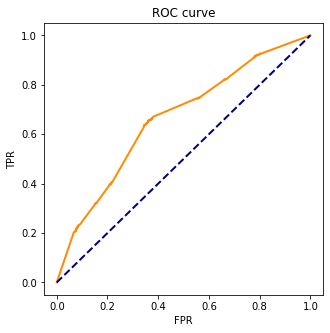

In [101]:
roc_auc_score(valid_y, EV_intention_clf.predict_proba(valid_X_pca300)[:,1])

fpr, tpr, _ = roc_curve(valid_y, EV_pred_prob[:,1])
plt.figure(figsize=[5, 5])
lw = 2

#plt.clf()
plt.plot(fpr, tpr,color='darkorange',
         lw=lw)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')
plt.show()

In [102]:
# Confusion matrices for EV intention neural network model. 

# Identify and display confusion matrix for training partition. 
print('Training Partition for Neural Network Model')
classificationSummary(train_y, EV_intention_clf.predict(train_X_pca300))

# Identify and display confusion matrix for validation partition. 
print()
print('Validation Partition for Neural Network Model')
classificationSummary(valid_y, EV_intention_clf.predict(valid_X_pca300))
print(classification_report(valid_y, EV_intention_clf.predict(valid_X_pca300)))

Training Partition for Neural Network Model
Confusion Matrix (Accuracy 0.8498)

       Prediction
Actual    0    1
     0 1583  254
     1  366 1925

Validation Partition for Neural Network Model
Confusion Matrix (Accuracy 0.6463)

       Prediction
Actual   0   1
     0 523 294
     1 332 621
              precision    recall  f1-score   support

           0       0.61      0.64      0.63       817
           1       0.68      0.65      0.66       953

    accuracy                           0.65      1770
   macro avg       0.65      0.65      0.65      1770
weighted avg       0.65      0.65      0.65      1770



<AxesSubplot:>

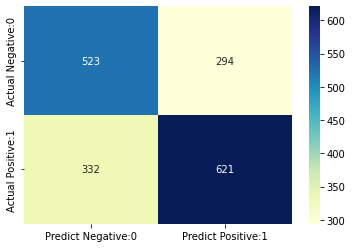

In [103]:
cm = confusion_matrix(valid_y, EV_intention_clf.predict(valid_X_pca300))
cm_matrix = pd.DataFrame(data=cm, columns= ['Predict Negative:0','Predict Positive:1'], 
                                 index=[ 'Actual Negative:0','Actual Positive:1'])
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

## Neural network Model using Grid Search

In [109]:
# Identify grid search parameters. 
param_grid = {
    'hidden_layer_sizes': list(range(2, 20)), 
}

# Utilize GridSearchCV() to identify the best number 
# of nodes in the hidden layer. 
gridSearch = GridSearchCV(MLPClassifier(solver='lbfgs', max_iter=10000, random_state=1), 
                          param_grid, cv=5, n_jobs=-1, return_train_score=True)
gridSearch.fit(train_X_pca300, train_y)

# Display the best score and best parament value.
print(f'Best score:{gridSearch.best_score_:.4f}')
print('Best parameter: ', gridSearch.best_params_)

Best score:0.6732
Best parameter:  {'hidden_layer_sizes': 19}


In [110]:
# Use MLPCclassifier() function to train the improved neural network model
# based on grid search results. 

# Apply: 
# (a) default input layer with the number of nodes equal 
#     to number of predictor variables (20); 
# (b) single hidden layer with 10 nodes based on grid search; 
# (c) default output layer with the number nodes equal
#     to number of classes in outcome variable (2);
# (d) 'logistic' activation function;
# (e) solver = 'lbfgs', which is applied for small data 
#     sets for better performance and fast convergence. 
#     For large data sets, apply default solver = 'adam'. 
EV_clf_imp = MLPClassifier(hidden_layer_sizes=(18), max_iter=10000,
                activation='logistic', solver='lbfgs', random_state=1)
EV_clf_imp.fit(train_X_pca300, train_y)

# Display network structure with the final values of 
# intercepts (Theta) and weights (W).
print('Final Intercepts for EV intention Neural Network Model based on grid search')
print(EV_clf_imp.intercepts_)

print()
print('Network Weights for EV intention Neural Network Model based on grid search')
print(EV_clf_imp.coefs_)

Final Intercepts for EV intention Neural Network Model based on grid search
[array([ 0.56293463, -2.62673424,  1.21850365, -0.93484227,  2.50566452,
       -2.3348233 , -2.08511002, -0.92536892,  0.7488851 , -0.89502876,
       -1.44334511,  2.30720389,  0.87034916, -2.67096755,  0.07300052,
       -0.25116536, -2.41889088, -0.70558649]), array([7.25610088])]

Network Weights for EV intention Neural Network Model based on grid search
[array([[  1.45298898,   7.61156492,  -3.55635666, ..., -10.58979229,
         -0.92241729,  -7.58564599],
       [ -2.30286896,  -3.42602596,   2.29745818, ...,   4.02504756,
          2.17939526,   0.34783084],
       [ -1.01172908,   1.27132426,   0.09156786, ...,   1.46416393,
          2.43340501,   2.36969022],
       ...,
       [  0.29890937,   3.42470647,  -0.1301215 , ...,  -0.699819  ,
         -0.78075607,   0.79738009],
       [  0.76201827,  -3.75917471,   1.67172722, ...,   1.06336643,
         -0.09464937,  -1.92981686],
       [  0.5943111

In [111]:
# Make EV intention classification for validation set 
# using EV intention neural network model. 

# Use EV_clf_imp model to classify EV intention
# for validation set.
EV_pred_imp = EV_clf_imp.predict(valid_X_pca300)

# Predict EV intention probabilities p(0), p(1),
# and p(2) for validation set.
EV_pred_prob_imp = np.round(EV_clf_imp.predict_proba(valid_X_pca300), 
                          decimals=4)

# Create data frame to display classification results for
# validation set. 
EV_pred_imp_result = pd.DataFrame({'Actual': valid_y, 
                'p(0)': [p[0] for p in EV_pred_prob_imp],
                'p(1)': [p[1] for p in EV_pred_prob_imp],
                'Classification': EV_pred_imp})

print('Classification for EV intention Data for Validation Partition')
print(EV_pred_imp_result.head(10))

Classification for EV intention Data for Validation Partition
     Actual    p(0)    p(1)  Classification
573       1  0.0000  1.0000               1
3219      1  0.0034  0.9966               1
4436      0  0.2830  0.7170               1
3887      1  1.0000  0.0000               0
3656      1  0.0001  0.9999               1
3680      1  0.9947  0.0053               0
1513      1  0.9998  0.0002               0
79        1  0.0000  1.0000               1
4072      1  0.9772  0.0228               0
3259      0  0.9999  0.0001               0


In [112]:
#calculate AUC of model
auc = metrics.roc_auc_score(valid_y, EV_clf_imp.predict_proba(valid_X_pca300)[:,1])

#print AUC score
print(auc)

0.7120065347976691


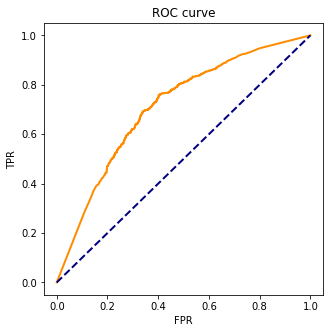

In [113]:
roc_auc_score(valid_y, EV_clf_imp.predict_proba(valid_X_pca300)[:,1])

fpr, tpr, _ = roc_curve(valid_y, EV_pred_prob_imp[:,1])
plt.figure(figsize=[5, 5])
lw = 2

#plt.clf()
plt.plot(fpr, tpr,color='darkorange',
         lw=lw)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')
plt.show()

In [114]:
# Confusion matrices for improved neural network model for EV intention
# using grid search results. 

# Identify and display confusion matrix for training partition. 
print('Training Partition for Neural Network Model based on grid search')
classificationSummary(train_y, EV_clf_imp.predict(train_X_pca300))

# Identify and display confusion matrix for validation partition. 
print()
print('Validation Partition for Neural Network Model based on grid search')
classificationSummary(valid_y, EV_clf_imp.predict(valid_X_pca300))
print(classification_report(valid_y, EV_clf_imp.predict(valid_X_pca300)))

Training Partition for Neural Network Model based on grid search
Confusion Matrix (Accuracy 0.9969)

       Prediction
Actual    0    1
     0 1832    5
     1    8 2283

Validation Partition for Neural Network Model based on grid search
Confusion Matrix (Accuracy 0.6729)

       Prediction
Actual   0   1
     0 511 306
     1 273 680
              precision    recall  f1-score   support

           0       0.65      0.63      0.64       817
           1       0.69      0.71      0.70       953

    accuracy                           0.67      1770
   macro avg       0.67      0.67      0.67      1770
weighted avg       0.67      0.67      0.67      1770



<AxesSubplot:>

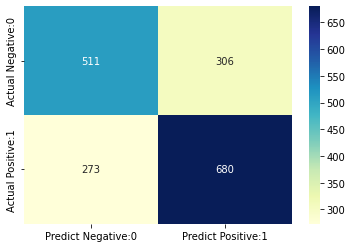

In [115]:
cm = confusion_matrix(valid_y, EV_clf_imp.predict(valid_X_pca300))
cm_matrix = pd.DataFrame(data=cm, columns= ['Predict Negative:0','Predict Positive:1'], 
                                 index=[ 'Actual Negative:0','Actual Positive:1'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

# Neural network Model using Grid Search with more hyper tuning

In [ ]:
# Identify grid search parameters. 
param_grid = {
    'hidden_layer_sizes': list(range(2, 20)), 
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive'],
}

# Utilize GridSearchCV() to identify the best number 
# of nodes in the hidden layer. 
gridSearch = GridSearchCV(MLPClassifier(max_iter=100, random_state=1), 
                          param_grid, cv=5, n_jobs=-1, return_train_score=True)
gridSearch.fit(train_X_pca300, train_y)

# Display the best score and best parament value.
print(f'Best score:{gridSearch.best_score_:.4f}')
print('Best parameter: ', gridSearch.best_params_)

In [ ]:
# Use MLPCclassifier() function to train the improved neural network model
# based on grid search results. 

# Apply: 
# (a) default input layer with the number of nodes equal 
#     to number of predictor variables (20); 
# (b) single hidden layer with 10 nodes based on grid search; 
# (c) default output layer with the number nodes equal
#     to number of classes in outcome variable (2);
# (d) 'logistic' activation function;
# (e) solver = 'lbfgs', which is applied for small data 
#     sets for better performance and fast convergence. 
#     For large data sets, apply default solver = 'adam'. 
EV_clf_imp = MLPClassifier(hidden_layer_sizes=(18), max_iter=10000,
                activation='logistic', solver='lbfgs', random_state=1)
EV_clf_imp.fit(train_X_pca300, train_y)

# Display network structure with the final values of 
# intercepts (Theta) and weights (W).
print('Final Intercepts for EV intention Neural Network Model based on grid search')
print(EV_clf_imp.intercepts_)

print()
print('Network Weights for EV intention Neural Network Model based on grid search')
print(EV_clf_imp.coefs_)

In [ ]:
# Make EV intention classification for validation set 
# using EV intention neural network model. 

# Use EV_clf_imp model to classify EV intention
# for validation set.
EV_pred_imp = EV_clf_imp.predict(valid_X_pca300)

# Predict EV intention probabilities p(0), p(1),
# and p(2) for validation set.
EV_pred_prob_imp = np.round(EV_clf_imp.predict_proba(valid_X_pca300), 
                          decimals=4)

# Create data frame to display classification results for
# validation set. 
EV_pred_imp_result = pd.DataFrame({'Actual': valid_y, 
                'p(0)': [p[0] for p in EV_pred_prob_imp],
                'p(1)': [p[1] for p in EV_pred_prob_imp],
                'Classification': EV_pred_imp})

print('Classification for EV intention Data for Validation Partition')
print(EV_pred_imp_result.head(10))

In [ ]:
#calculate AUC of model
auc = metrics.roc_auc_score(valid_y, EV_clf_imp.predict_proba(valid_X_pca300)[:,1])

#print AUC score
print(auc)

In [ ]:
roc_auc_score(valid_y, EV_clf_imp.predict_proba(valid_X_pca300)[:,1])

fpr, tpr, _ = roc_curve(valid_y, EV_pred_prob_imp[:,1])
plt.figure(figsize=[5, 5])
lw = 2

#plt.clf()
plt.plot(fpr, tpr,color='darkorange',
         lw=lw)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')
plt.show()

In [ ]:
# Confusion matrices for improved neural network model for EV intention
# using grid search results. 

# Identify and display confusion matrix for training partition. 
print('Training Partition for Neural Network Model based on grid search')
classificationSummary(train_y, EV_clf_imp.predict(train_X_pca300))

# Identify and display confusion matrix for validation partition. 
print()
print('Validation Partition for Neural Network Model based on grid search')
classificationSummary(valid_y, EV_clf_imp.predict(valid_X_pca300))
print(classification_report(valid_y, EV_clf_imp.predict(valid_X_pca300)))